# Corona Virus (COVID-19) Exploratory Data Analysis and Forecasting

This project focuses on a detailed analysis of COVID-19 confirmed, recovered, and death cases between January 2020 and May 2021 across the world, grouped by country and province. The dataset includes key metrics such as the number of cases and deaths reported during this period, providing insights into the pandemic's impact on different regions.

After the exploratory analystive analying will be performed to forecast the number of death cases in each province.

The dataset used for this analysis was sourced from [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset), which originally collected the data from John Hopkins University and the World Health Organization (W.H.O).


### Installation of Necessary Algorithms

In [237]:
# !pip install prophet
# !pip install pycountry

### Importation of Necessary Libaries

In [239]:
# imports pandas library for working with Dataframe
import pandas as pd

# import numpy library for working with arrays
import numpy as np

# imports seaborn library
import seaborn as sns

# imports matplotlib library to assist in visualization
import matplotlib.pyplot as plt

# imports Z-Score Library for detecting Outliers
from scipy.stats import zscore

# imorts the boxcox library for handling outliers
from scipy.stats import boxcox

# imports graph objects for creating visualizations
import plotly.graph_objects as go

# imports plotly express for quick and easy data visualizations
import plotly.express as px

# imports the pycountry library for accessing country names and ISO country codes
import pycountry

# imports the label encoder library
from sklearn.preprocessing import LabelEncoder

# imports cross-validation library for evaluating the model
from prophet.diagnostics import cross_validation

# imports model algorithm that will be used for training
from prophet import Prophet

 # imports namedtuple from collections to create simple classes
from collections import namedtuple 

# imports evaluation metric from sklear
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# imports joblib for model saving
import joblib



### Reads the CSV File(s) into a Dataframe

To ensure proper randomization and avoid potential issues during data splitting, I first combined the initial training and testing datasets into a single data.


In [241]:
df = pd.read_csv("covid_19_data.csv") # reads the train dataset into the "train_df" variable


### Exploratory Data Analysis (EDA)

In [243]:
df.head() # displays the earliest cases

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [244]:
df.tail() # displays the latest cases

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [245]:
# displays out the shape of the data

print(df.shape)

(306429, 8)


#### Renaming Columns
Renaming columns like `ObservationDate` to `Date`, `Province/State` to `Province`, and `Country/Region` to `Country` simplifies the dataset, making it more readable and easier to work with for analysis. This enhances clarity and consistency in the data structure.

In [247]:
df.rename(columns = {"ObservationDate" : "Date", "Province/State" : "Province",  "Country/Region" : "Country"}, inplace = True) # renames specifies columns in the datframe directly.

In [248]:
df.head() # displays the modified dataframe

,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


#### Checking for Uniques

Upon examining the data, four categorical columns were identified: `Date`, `Province`, `Country`, and `Last Update`. To gain a clearer understanding of the unique categories within each column, the unique values will be printed for the `Province` and the `Country` respectively.


In [250]:
unique_provinces = df['Province'].unique() # gets the unique categories in the province feature column
unique_countries = df['Country'].unique() # gets the unique categories in the country feature column
print(f""" 
Unique Provinces:

{unique_provinces})

Unique Countries:

{unique_countries}""") # re-prints the unique categories for the province and country feature columns to further confirm changes

 
Unique Provinces:

['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei'
 'Hunan' 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau'
 'Ningxia' 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan'
 'Taiwan' 'Tianjin' 'Tibet' 'Washington' 'Xinjiang' 'Yunnan' 'Zhejiang'
 nan 'Unknown' 'Chicago' 'Illinois' 'California' 'Arizona' 'Ontario'
 'New South Wales' 'Victoria' 'British Columbia' 'Bavaria' 'Queensland'
 'Chicago, IL' 'South Australia' 'Boston, MA' 'Los Angeles, CA'
 'Orange, CA' 'Santa Clara, CA' 'Seattle, WA' 'Tempe, AZ' 'San Benito, CA'
 'Toronto, ON' 'London, ON' 'Madison, WI' 'Cruise Ship'
 'Diamond Princess cruise ship' 'San Diego County, CA' 'San Antonio, TX'
 'Ashland, NE' 'Travis, CA' 'From Diamond Princess' 'Lackland, TX'
 'Humboldt County, CA' 'Sacramento County, CA'
 'Omaha, NE (From Diamond Princess)' 'Travis, CA (From Diamond Princess)'
 'Lackland, TX (From Dia

##### Observation
Reviewing the list of unique countries revealed that 'Mainland China' and 'China' likely refer to the same entity, and countries like the US and UK were represented by their abbreviations instead of full names. To ensure consistency and clarity, 'Mainland China' was replaced with 'China,' and abbreviations 'US' and 'UK' were expanded to 'United States' and 'United Kingdom,' respectively. Additionally, it was discovered that some rows contained values with keywords 'Unknown' and 'Unassigned,' indicating invalid inputs. To resolve this issue, the corresponding value from the 'Country' column was used to fill these entries in the 'Province' column.

In [252]:
# renames specifies unique categories for better clarity and consistency
df["Country"].replace({"Mainland China" : "China", "US" : "United States",  "UK" : "United Kingdom"}, inplace = True) 

C:\Users\hp\AppData\Local\Temp\ipykernel_2544\800132077.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [253]:
df['Province'] = df['Province'].astype(str) # ensures the 'Province' column is of string type berfore any processing

# replaces rows with key words 'Unknown' and 'Unassigned' in 'Province' column with the corresponding value from 'Country' column using regex and lambda function

df['Province'] = df.apply(
    lambda row: row['Country'] if any(keyword in row['Province'] for keyword in ['Unknown', 'Unassigned', 'nan']) else row['Province'],
    axis=1
) 

# converts the 'Province' and 'Country' columns back to object type
df['Province'] = df['Province'].astype(object)
df['Country'] = df['Country'].astype(object)


In [254]:
df.head() # displays the modified dataframe to confirm changes

,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0


In [255]:
unique_provinces = df['Province'].unique() # gets the unique categories in the province feature column
unique_countries = df['Country'].unique() # gets the unique categories in the country feature column
print(f""" 
Unique Provinces:

{unique_provinces})

Unique Countries:

{unique_countries}""") # re-prints the unique categories for the province and country feature columns to further confirm changes

 
Unique Provinces:

['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'China' 'Hebei' 'Heilongjiang' 'Hong Kong' 'Hubei'
 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau' 'Ningxia'
 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Taiwan'
 'Tianjin' 'Tibet' 'Washington' 'Xinjiang' 'Zhejiang' 'Japan' 'Thailand'
 'South Korea' 'Kiribati' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam'
 'Australia' 'Mexico' 'Brazil' 'Colombia' 'Chicago' 'France' 'Illinois'
 'Nepal' 'California' 'Arizona' 'Ontario' 'Cambodia' 'Sri Lanka'
 'Ivory Coast' 'New South Wales' 'Victoria' 'British Columbia' 'Bavaria'
 'Finland' 'United Arab Emirates' 'Queensland' 'India' 'Italy'
 'United Kingdom' 'Russia' 'Sweden' 'Germany' 'Chicago, IL'
 'South Australia' 'Spain' 'Boston, MA' 'Los Angeles, CA' 'Orange, CA'
 'Santa Clara, CA' 'Seattle, WA' 'Tempe, AZ' 'San Benito, CA'
 'Toronto, ON' 'Belgium' 'London, ON' 'Madison, WI' 'Cruise Ship'
 'Diamond Princess crui

#### Describing the Data Using Statistical Terms (i.e Summary Statistics)

- Count: The number of observations or data points in each feature column.
- Mean: The average value of the observations in each feature column.
- Max: The highest value observed in each feature column.
- Standard Deviation: A measure of how spread out the observations are from the mean.
- 25th Percentile: The value below which 25% of the data falls.
- 50th Percentile / Median: The middle value, with 50% of data below and 50% above.
- 75th Percentile: The value below which 75% of the data falls.

Note: describe only works for numerical datatype columns 

In [257]:
df.describe() # describes the data

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


#### Summarizing the Dataframe's Structure

- Provides a concise summary of the DataFrame.
- Displays the total number of rows (entries) which could help in detecting missing values.
- Shows the number of non-null values in each column.
- Lists the data types of each column (e.g., int64, float64, object for categorical data).
- Gives the memory usage of the DataFrame.



In [259]:
df.info() # displays the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SNo          306429 non-null  int64  
 1   Date         306429 non-null  object 
 2   Province     306429 non-null  object 
 3   Country      306429 non-null  object 
 4   Last Update  306429 non-null  object 
 5   Confirmed    306429 non-null  float64
 6   Deaths       306429 non-null  float64
 7   Recovered    306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


##### Observation:


After reviewing the summaries of the dataframe, it was noted that the "Province" column contained missing value (s).



### Checking for Missing Values

In [262]:
missing_col_lst = df.columns[df.isnull().any()].tolist() # checks all columns in the dataframe for missing values and stores the column name in a list.

print(f"""
List of Columns in the Dataframe with Missing Values: 

{missing_col_lst}

Number of Columns in the Dataframe with Missing Values:

{len(missing_col_lst)}

""") # prints the list and number of all columns that have missing values.




List of Columns in the Dataframe with Missing Values: 

[]

Number of Columns in the Dataframe with Missing Values:

0




### Handling Missing Values 
Missing values in categorical columns are often filled using the mode, while numerical columns (e.g., `int64`, `float64`) are typically handled by imputing the mean or median. However, for this dataset, it is more appropriate to replace missing values in the `Province` column with the corresponding `Country` name, rather than using the most frequent `Province` (mode), ensuring more accurate regional representation.
."

In [264]:
# applies the lambda function to all rows in the dataframe to replace missing values in the Province column with corresponding Country names.

df["Province"] = df.apply(lambda row: row["Country"] if pd.isnull(row["Province"]) else row["Province"], axis = 1) 

In [265]:
df.info() # displays the summary of the dataframe to confirm that the missing values have been handled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SNo          306429 non-null  int64  
 1   Date         306429 non-null  object 
 2   Province     306429 non-null  object 
 3   Country      306429 non-null  object 
 4   Last Update  306429 non-null  object 
 5   Confirmed    306429 non-null  float64
 6   Deaths       306429 non-null  float64
 7   Recovered    306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


### Data Structuring

This section ensures proper structuring of the `Date` and `Last Update` columns by converting them into `datetime` objects. This conversion is crucial for facilitating time-based analysis and operations.

#### Steps to be Performed:
1. **Check Column Data Types:** Verify the current data types of the `Date` and `Last Update` columns to understand their initial formats.
2. **Convert to Datetime Objects:** Convert these columns to `datetime` objects using `pd.to_datetime()`. This transformation allows for efficient time series analysis, sorting, and other date-related operations.
3. **Set Date as Index (if needed):** Set the `Date` column as the DataFramquired, to streamline time-based opernalysis.
nalysis.


In [267]:
df.dtypes # displays the datatype for each column in the dataframe

SNo              int64
Date            object
Province        object
Country         object
Last Update     object
Confirmed      float64
Deaths         float64
Recovered      float64
dtype: object

In [268]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed') # converts the "Date" column in the dataframe to a datetime object
df['Last Update'] = pd.to_datetime(df['Last Update'], format='mixed') # converts the "Last Update" column in the dataframe to a datetime object

In [269]:
df.dtypes # confirms that the datetype for the "Date" and "Last Update" columns have been changed

SNo                     int64
Date           datetime64[ns]
Province               object
Country                object
Last Update    datetime64[ns]
Confirmed             float64
Deaths                float64
Recovered             float64
dtype: object

In [270]:
df.set_index("Date", inplace=True) # sets the "Date" column feature as the index of the dataframe to enable efficient time based operation.

In [271]:
df.head() # displays the modified dataframe

,SNo,Province,Country,Last Update,Confirmed,Deaths,Recovered
Date,,,,,,,
2020-01-22,1,Anhui,China,2020-01-22 17:00:00,1.0,0.0,0.0
2020-01-22,2,Beijing,China,2020-01-22 17:00:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,China,2020-01-22 17:00:00,6.0,0.0,0.0
2020-01-22,4,Fujian,China,2020-01-22 17:00:00,1.0,0.0,0.0
2020-01-22,5,Gansu,China,2020-01-22 17:00:00,0.0,0.0,0.0


### Checking for Outliers Using a Time Series Plot
Outliers will be detected using time series plots, which visualize data over time. By observing the plot, deviations from the expected trend or sudden spikes and drops can be identified as potential outliers. This method helps in spotting unusual patterns or anomalies in the time series data.

---

**Note:** This works for only numerical (i.e dtype int64 or float64) columns.

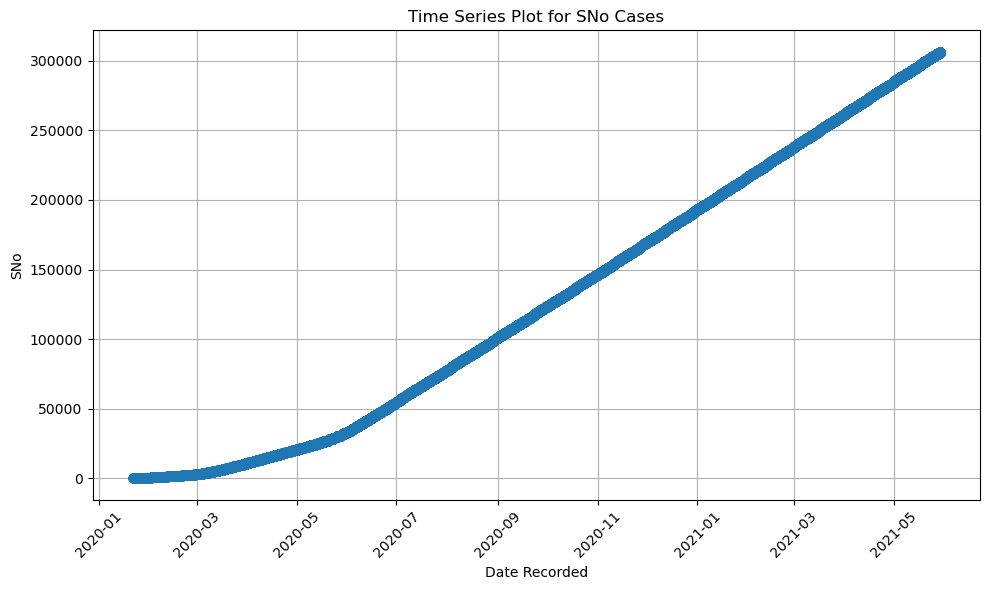

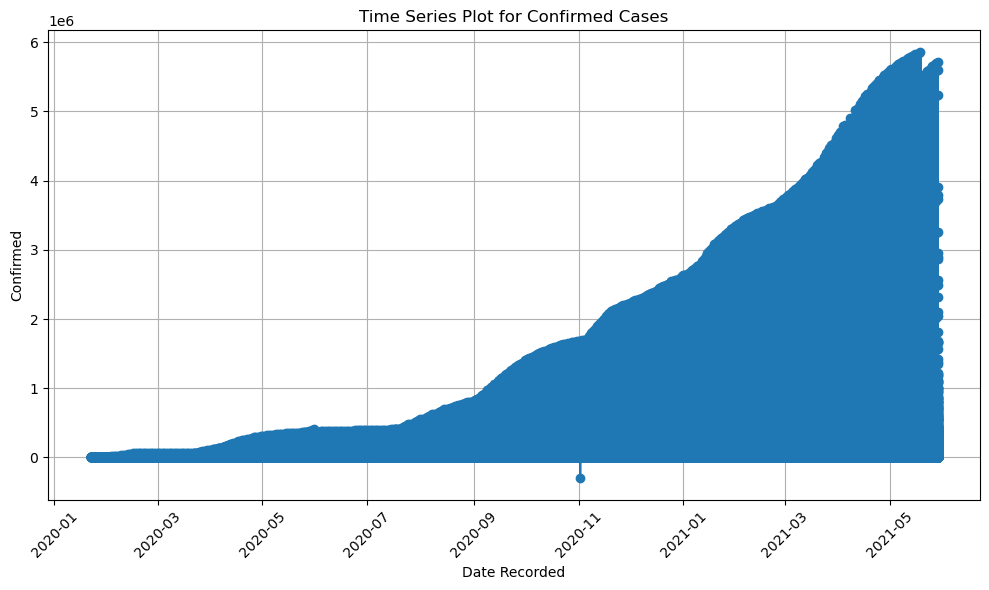

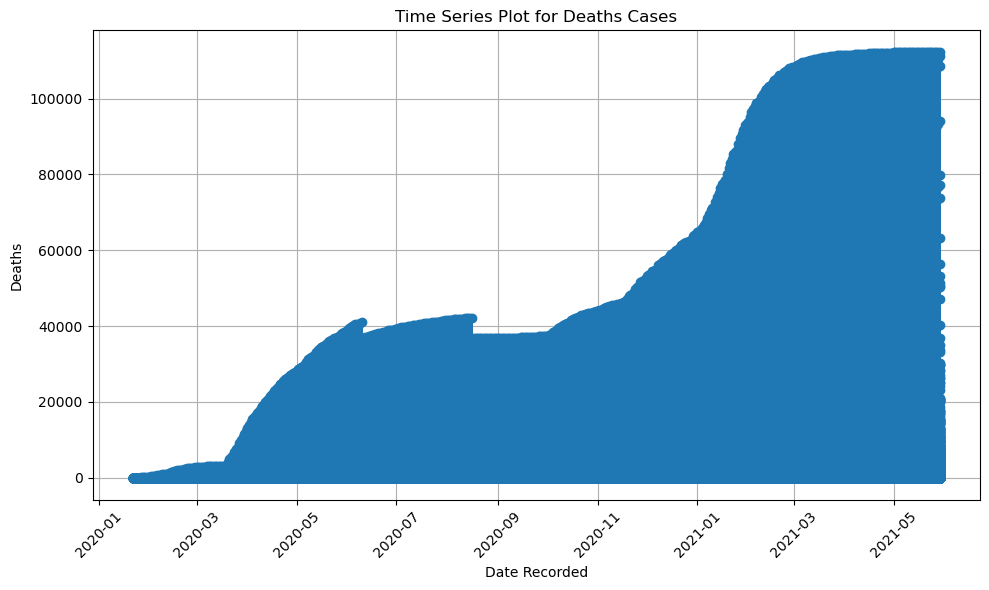

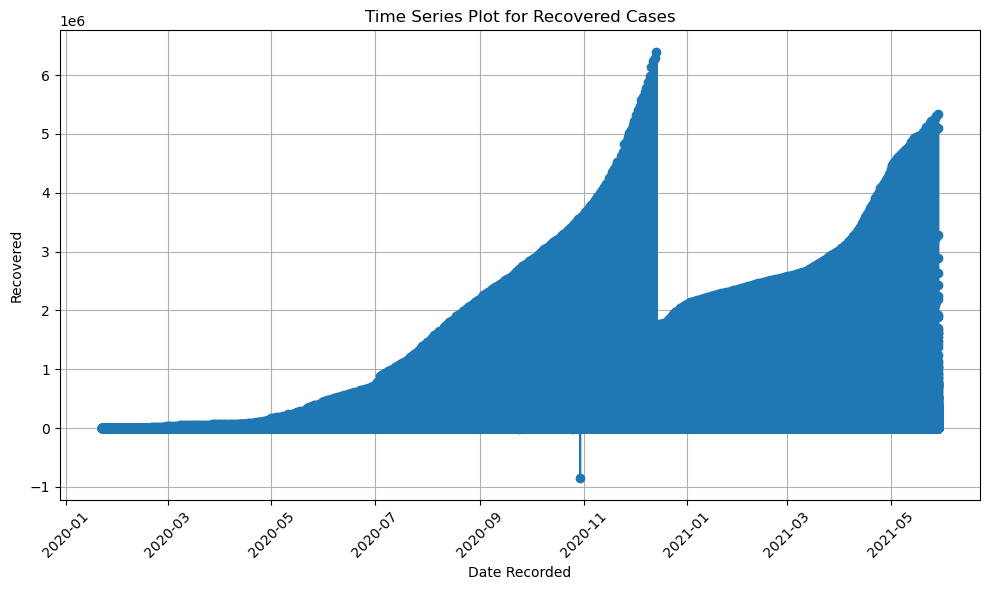

In [273]:
# time series plots for Confirmed, Recovery and Death Cases

numerical_columns = df.select_dtypes(include=['number']).columns # gets only the numerical columns from the DataFrame

# loops through each numerical column and creates a plot
for col in numerical_columns:
    plt.figure(figsize=(10, 6))  # specifies the size of the plot (10 by 6 inches)
    plt.plot(df.index, df[col], marker='o', linestyle='-')  # plots the specified column
    plt.title(f'Time Series Plot for {col} Cases')  # sets the plot title based on the column name
    plt.xlabel('Date Recorded')  # specifies the x-axis label
    plt.ylabel(f'{col}')  # sets the y-axis label based on the column name
    plt.grid(True)  # adds a grid for better readability
    plt.xticks(rotation=45)  # rotates date labels for better readability
    plt.tight_layout()  # adjusts the layout to prevent overlapping
    plt.show()  # displays the plot



##### Observation

The following observations were made based on the time series plots:

- **General Observation:** Most trends did not exhibit any unusual spikes, suggesting stable data patterns over time.

- **Serial Number Plot:** The serial numbers increased consistently over time, as expected.

- **Confirmed Cases Plot:** The number of confirmed cases steadily increased from January 2020 to May 2021. However, an unusual spike occurred in November 2020, indicating a potential outlier.

- **Death Cases Plot:** Similar to the confirmed cases, the number of death cases gradually rose from January 2020 to May 2021. An unusual spike was also observed in November 2020, which may indicate an outlier.

- **Recovered Cases Plot:** The number of recovered cases increased gradually from January 2020 until December 2020. After a brief decline around December 2020, the trend resumed a steady increase from January 2021. Similar to the other plots, an unusual spike was observed in November 2020, indicating a potential outlier.


### Detect and Handle Ouliers Using Z-Score

Detecting outliers is crucial as they can significantly impact the results of data analysis and modeling. The Z-score measures how many standard deviations a data point is from the mean. It helps identify outliers by quantifying deviations; data points with a Z-score greater than a threshold (e.g., 3) are considered outliers. The Z-score formula is:

$$
Z = \frac{(X - \mu)}{\sigma}
$$

where $X$ is the data point, $\mu$ is the mean, and $\sigma$ is the standard deviation. Addressing outliers ensures more reliable and robust analysis outcomes.


In [276]:
def detect_and_handle_outliers(df, z_thresh=3):
    """
    Detects and handles outliers in a DataFrame using Z-scores.
    
    Parameters:
    - df: pd.DataFrame - DataFrame with numerical columns to process
    - z_thresh: float - Z-score threshold for identifying outliers (default is 3)
    
    Returns:
    - outlier_columns: list - List of column names that contain outliers
    - df: pd.DataFrame - DataFrame with outliers handled (capped to mean ± z_thresh * std)
    """
    outlier_columns = {} # creates a list to store the columns having outliers
    numeric_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != "SNo"] # checks for numeric datatype feature columns using list comprehension and excluding the "SNo" feature column

    # for loop to iterate through all numeric columns
    for col in numeric_columns:
        
        z_scores = zscore(df[col].dropna())  # computes the Z score for the columns while dropping NaN values 
        
        outliers = np.where(np.abs(z_scores) > z_thresh)[0] # detects outliers based on the Z-score threshold
        
        if len(outliers) > 0:
            outlier_columns[col] = len(outliers)  # stores columns with outliers and the specific number of instances
            
            # handles outliers by capping them to the mean ± z_thresh * std
            
            mean = df[col].mean() # computes the mean of the current column
            std = df[col].std() # computes the standard deviation of the current column
            
            lower_bound = mean - (z_thresh * std) # computes the lower boundary threshold
            upper_bound = mean + (z_thresh * std) # computes the upper boundary threshold

            
            df[col] = np.clip(df[col], lower_bound, upper_bound) # caps outliers to the bounds
    
    return outlier_columns, df  # returns the list of columns with outliers and the new dataframe


In [277]:
# Get columns with outliers and the modified DataFrame
outlier_columns, df = detect_and_handle_outliers(df)

print("Columns with outliers:", outlier_columns) # prints the list of columns with outliers

Columns with outliers: {'Confirmed': 4527, 'Deaths': 5130, 'Recovered': 4745}


In [278]:
df.head() # displays the modifies dataframe

,SNo,Province,Country,Last Update,Confirmed,Deaths,Recovered
Date,,,,,,,
2020-01-22,1,Anhui,China,2020-01-22 17:00:00,1.0,0.0,0.0
2020-01-22,2,Beijing,China,2020-01-22 17:00:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,China,2020-01-22 17:00:00,6.0,0.0,0.0
2020-01-22,4,Fujian,China,2020-01-22 17:00:00,1.0,0.0,0.0
2020-01-22,5,Gansu,China,2020-01-22 17:00:00,0.0,0.0,0.0


In [279]:
df.describe()  # describes the dataframe to confirm if outliers have been handled

,SNo,Last Update,Confirmed,Deaths,Recovered
count,306429.000000,306429,306429.000000,306429.000000,306429.000000
mean,153215.000000,2021-03-11 01:14:17.227314944,72110.716861,1701.397274,40343.674364
min,1.000000,2020-01-22 17:00:00,-302844.000000,-178.000000,-554117.057210
25%,76608.000000,2021-04-02 15:13:53,1042.000000,13.000000,11.000000
50%,153215.000000,2021-04-02 15:13:53,10375.000000,192.000000,1751.000000
75%,229822.000000,2021-04-02 15:13:53,50752.000000,1322.000000,20270.000000
max,306429.000000,2021-05-30 04:20:55,918325.723688,21269.217411,654957.629819
std,88458.577156,NaN,164034.015592,3834.456243,110402.974185


### Checking for Skewness
Skewness measures the asymmetry of the data distribution around the mean. Positive skewness indicates a distribution with a longer right tail, while negative skewness signifies a longer left tail. The skewness formula is:

$$
\text{Skewness} = \frac{n}{(n-1)(n-2)} \sum_{i=1}^n \frac{(X_i - \bar{X})^3}{\sigma^3}
$$

where $n$ is the number of observations, $X_i$ represents each data point, $\bar{X}$ is the mean, and $\sigma$ is the standard deviation. Checking for skewness helps in applying transformations to normalize the data and improve the effectiveness of statistical analyses and models.



In [281]:
def detect_skewed_columns(df, skew_threshold=0.5):
    """
    Identifies columns in the DataFrame with significant skewness.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - skew_threshold (float): The threshold for skewness to consider a column as significantly skewed. Default is 0.5.

    Returns:
    - dict: A dictionary where the keys are the names of the skewed columns, and the values are their skewness values.
    """
    skewed_columns = {}
    
    # Iterate through each numeric column in the DataFrame
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        skewness = df[col].skew()  # Calculate skewness of the column
        
        # If the absolute value of skewness is greater than the threshold, store the column name and its skewness
        if abs(skewness) > skew_threshold:
            skewed_columns[col] = skewness
    
    return skewed_columns


In [282]:
skewed_columns = detect_skewed_columns(df) # calls the "detect_skewed_columns" function on the outlier free df

print(f"""
Columns with significant skewness: 

{skewed_columns}

Count:

{len(skewed_columns)}""") # prints the name of the columns with skewness and their respective values (i.e the extent to which they're skewed)



Columns with significant skewness: 

{'Confirmed': 3.561799364280206, 'Deaths': 3.5060223895952447, 'Recovered': 4.074113021774144}

Count:

3


### Visualizing the Skewness Using Seaborn

Seaborn offers tools for visualizing data distributions and assessing skewness. By specifying `kde=True` in `sns.displot()` or using `sns.kdeplot()`, the distribution shape can be observed along with the Kernel Density Estimate (KDE). These visualizations aid in identifying deviations from normality, helping to understand the extent and direction of skewness.


In [284]:
def visualize_skewness(df, skew_threshold=0.5):
    """
    Visualizes the distribution of columns with significant skewness in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - skew_threshold (float): The threshold for skewness to visualize. Default is 0.5.

    Prints:
    - Information about columns with significant skewness.
    - Plots the distribution of each skewed column.

    Returns:
    - None
    """
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Iterate through each numeric column
    for col in numeric_columns:
        skewness = df[col].skew()  # Calculate skewness of the column
        
        # Check if the absolute skewness is greater than the threshold
        if abs(skewness) > skew_threshold:
            print(f"Column: {col}, Skewness: {skewness}")
            
            # Create a distribution plot for the column
            sns.displot(df[col], kde=True, height=5, aspect=2)
            plt.title(f'Distribution of {col} (Skewness: {skewness:.2f})')
            plt.show()


Column: Confirmed, Skewness: 3.561799364280206


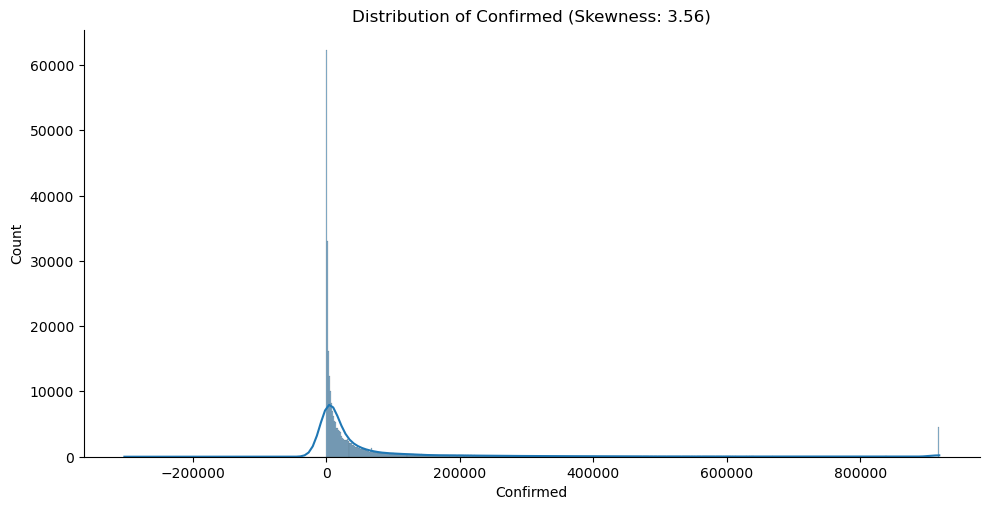

Column: Deaths, Skewness: 3.5060223895952447


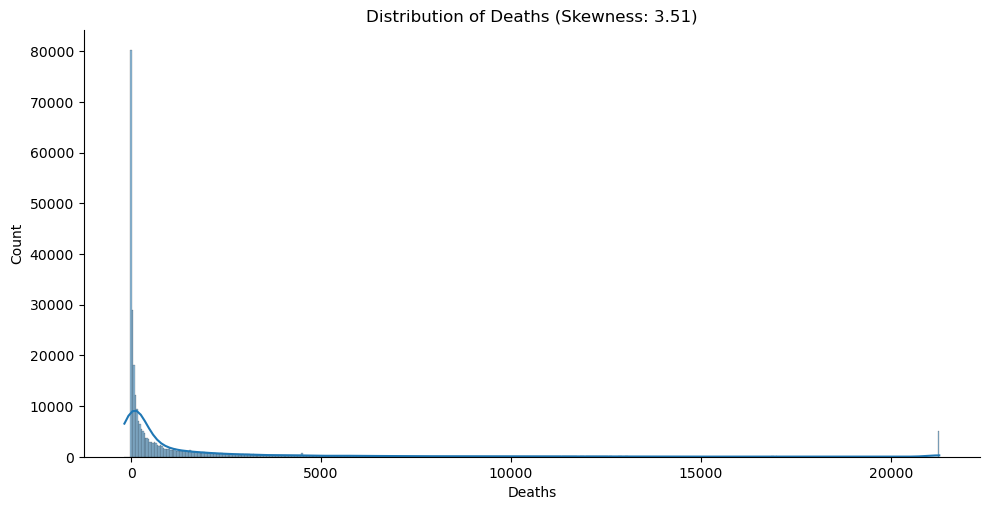

Column: Recovered, Skewness: 4.074113021774144


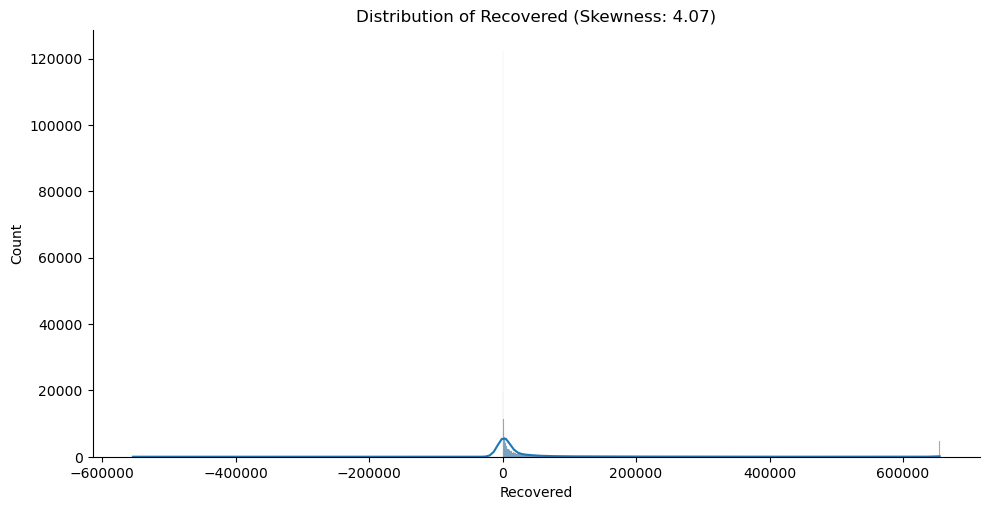

In [285]:
# visualizes skewness for columns in the dataframe with skewness above the threshold (0.5 by default)
visualize_skewness(df)


##### Observation
Despite very high skewed values in the `Confirmed`, `Deaths` and `Recovery` columns. It won't be handled right away until initial model training and evaluation

### Visualization

In [288]:
df = df.drop(["Last Update"], axis = 1) # drops the "Last Update" column from the dataframe

##### Worldwide Cases (Confirmed, Death and Recovered) By Date

In [290]:
df.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum() # groups the dataFrame by the 'Date' column to get the total (i.e., aggregate data for each date) of the "Confrirmed", "Death" and "Recovered" cases


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,5.570000e+02,1.700000e+01,3.000000e+01
2020-01-23,1.097000e+03,3.400000e+01,6.000000e+01
2020-01-24,9.410000e+02,2.600000e+01,3.900000e+01
2020-01-25,1.437000e+03,4.200000e+01,4.200000e+01
2020-01-26,2.118000e+03,5.600000e+01,5.600000e+01
...,...,...,...
2021-05-25,1.228864e+08,2.626724e+06,7.051451e+07
2021-05-26,1.231328e+08,2.633787e+06,7.070388e+07
2021-05-27,1.233778e+08,2.641023e+06,7.096319e+07


##### Worldwide Confirmed Cases By Date

In [292]:
dt_confirmed_cases = df.groupby("Date")[["Confirmed"]].sum().reset_index() # groups the dataFrame by the 'Date' column to get the total (i.e., aggregate data for each date) of the "Confrirmed", cases
dt_confirmed_cases # displays the grouped dataframe

,Date,Confirmed
0,2020-01-22,5.570000e+02
1,2020-01-23,1.097000e+03
2,2020-01-24,9.410000e+02
3,2020-01-25,1.437000e+03
4,2020-01-26,2.118000e+03
...,...,...
489,2021-05-25,1.228864e+08
490,2021-05-26,1.231328e+08
491,2021-05-27,1.233778e+08
492,2021-05-28,1.236006e+08


##### Worldwide Death Cases By Date

In [294]:
dt_death_cases = df.groupby("Date")[[ "Deaths"]].sum().reset_index() # groups the dataFrame by the 'Date' column to get the total (i.e., aggregate data for each date) of the "Death", cases
dt_death_cases # displays the grouped dataframe

,Date,Deaths
0,2020-01-22,1.700000e+01
1,2020-01-23,3.400000e+01
2,2020-01-24,2.600000e+01
3,2020-01-25,4.200000e+01
4,2020-01-26,5.600000e+01
...,...,...
489,2021-05-25,2.626724e+06
490,2021-05-26,2.633787e+06
491,2021-05-27,2.641023e+06
492,2021-05-28,2.647305e+06


##### Worldwide Recovered Cases By Date

In [296]:
dt_recovered_cases = df.groupby("Date")[["Recovered"]].sum().reset_index() # groups the dataFrame by the 'Date' column to get the total (i.e., aggregate data for each date) of the "Recovered", cases
dt_recovered_cases # displays the grouped dataframe

,Date,Recovered
0,2020-01-22,3.000000e+01
1,2020-01-23,6.000000e+01
2,2020-01-24,3.900000e+01
3,2020-01-25,4.200000e+01
4,2020-01-26,5.600000e+01
...,...,...
489,2021-05-25,7.051451e+07
490,2021-05-26,7.070388e+07
491,2021-05-27,7.096319e+07
492,2021-05-28,7.115769e+07


In [297]:
fig = go.Figure() # creates an empty plotly figure object 

##### Bar Plot for Worldwide COVID-19 Cases By Date

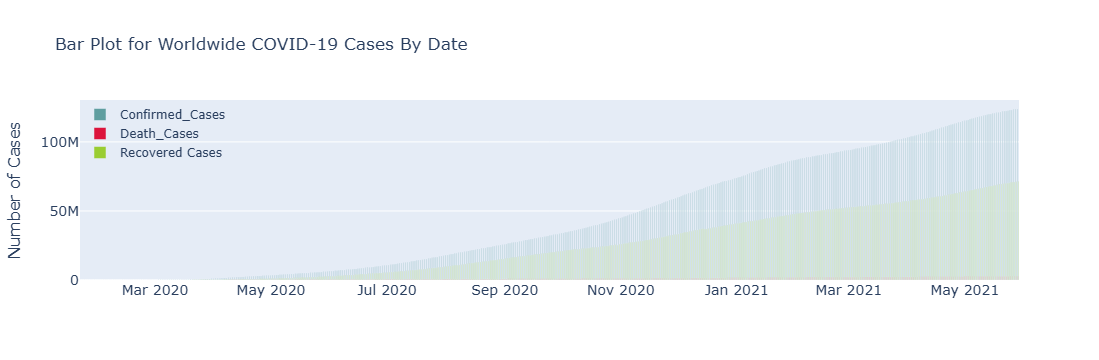

In [299]:

# adds a bar chart trace (i.e a data series) for Confirmed Cases to the plotly figure "fig"

fig.add_trace(go.Bar(x = dt_confirmed_cases['Date'], # sets "Date" column of the dataframe as the x-axis of the bar chart
                y = dt_confirmed_cases['Confirmed'], # sets "Confirmed" column of the dataframe as the y-axis of the bar chart
                name = 'Confirmed_Cases', # specifies the name of the trace (i.e Confirmed_Cases) to be displayed in the legend of the bar plot
                marker_color = 'cadetblue' # specifies the color of the trace to cadetblue
                ))

# adds a bar chart trace (i.e a data series) for Death Cases to the plotly figure "fig"

fig.add_trace(go.Bar(x = dt_death_cases['Date'], # sets "Date" column of the dataframe as the x-axis of the bar chart
                y = dt_death_cases['Deaths'], # sets "Deaths" column of the dataframe as the y-axis of the bar chart
                name = 'Death_Cases', # specifies the name of the trace (i.e Death_Cases) to be displayed in the legend of the bar plot
                marker_color = 'crimson'  # specifies the color of the trace to crimson
                ))

# adds a bar chart trace (i.e a data series) for Recovered Cases to the plotly figure "fig"

fig.add_trace(go.Bar(x=dt_recovered_cases['Date'], # sets "Date" column of the dataframe as the x-axis of the bar chart
                y = dt_recovered_cases['Recovered'], # sets "Recovered" column of the dataframe as the y-axis of the bar chart
                name = 'Recovered Cases',  # specifies the name of the trace (i.e Recovered_Cases) to be displayed in the legend of the bar plot
                marker_color = 'yellowgreen' # specifies the color of the trace to yellow green
                ))

# customizes the layout properties of the whole figure

fig.update_layout(
    title='Bar Plot for Worldwide COVID-19 Cases By Date', # specifies the title of the plot
    xaxis_tickfont_size = 14, # sets the font size of tick labels on the x-axis to 14

    # NOTE: the x-axis is by default the dates
    yaxis=dict(
        title='Number of Cases', # specifies the title of the y-axis
        titlefont_size = 16, # sets the font size of the y-axis title to 16
        tickfont_size = 14, # sets the font size of tick labels on the y-axis to 14
    ),

    # customizes the appearance and position of the legend in the plot
    
    legend=dict(
        x=0, # positions the legend horizontally at the left edge of the plot
        y=1.0, # positions the legend vertically at the top of the plot
        bgcolor='rgba(255, 255, 255, 0)', # sets the background color of the legend to be fully transparent -- rgba (i.e red, green, blue and opacity)
        bordercolor='rgba(255, 255, 255, 0)' # sets the border color of the legend to be fully transparent -- rgba (i.e red, green, blue and opacity)
    ),

    
    barmode='group', # displays the bars for each of the cases (Confirmed, Deaths and Recovered) all next to each other rather than stacking them on top of each other
    bargap=0.15, # sets the gap to 0.15 between bars traces for different cases on the same x-position
    bargroupgap=0.1 # sets the gap to 0.1 between bar traces within the same group.
)

fig.show() # displays the plot


##### Scattered Plot for Worldwide COVID-19 Cases By Date

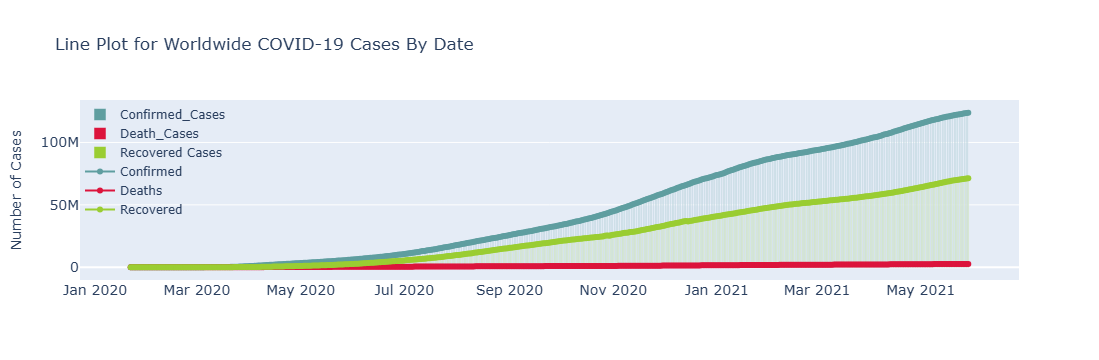

In [301]:

# adds a scattered plot for Confirmed Cases to the plotly figure "fig"

fig.add_trace(go.Scatter(x=dt_confirmed_cases['Date'], # sets "Date" column of the dataframe as the x-axis of the scattered plot
                         y=dt_confirmed_cases['Confirmed'], # sets "Confirmed" column of the dataframe as the x-axis of the scattered plot
                         mode='lines+markers', # combines both lines and markers to  show a continous trend with visual emphasis on individual points

                         # NOTE: The individual point is what enables the data for that particular point to be displayed
                         
                         name='Confirmed', # sets the label for the trace in the plot's legend to "Confirmed"
                         line=dict(color='cadetblue', width=2) # customizes the appearance of the scattered plot to have a "cadetblue" color and thickness of 2 pixels
                        ))

# adds a scattered plot for Death Cases to the plotly figure "fig"

fig.add_trace(go.Scatter(x=dt_death_cases['Date'], # sets "Date" column of the dataframe as the x-axis of the scattered plot
                         y=dt_death_cases['Deaths'], # sets "Deaths" column of the dataframe as the x-axis of the scattered plot
                         mode='lines+markers', # combines both lines and markers to  show a continous trend with visual emphasis on individual points

                          # NOTE: The individual point is what enables the data for that particular point to be displayed
                         
                         name='Deaths', # sets the label for the trace in the plot's legend to "Deaths"
                         line=dict(color='crimson', width=2) # customizes the appearance of the scattered plot to have a "cadetblue" color and thickness of 2 pixels
                        ))

# adds a scattered plot for Recovered Cases to the plotly figure "fig"

fig.add_trace(go.Scatter(x=dt_recovered_cases['Date'], # sets "Date" column of the dataframe as the x-axis of the scattered plot
                         y=dt_recovered_cases['Recovered'], # sets "Recovered" column of the dataframe as the x-axis of the scattered plot
                         mode='lines+markers', # combines both lines and markers to show a continous trend with visual emphasis on individual points

                         # NOTE: The individual point is what enables the data for that particular point to be displayed
                         
                         name='Recovered', # sets the label for the trace in the plot's legend to "Recovered"
                         line=dict(color='yellowgreen', width=2) # customizes the appearance of the scattered plot to have a "cadetblue" color and thickness of 2 pixels
                        ))

# customizes the layout properties of the whole figure

fig.update_layout(
    title='Line Plot for Worldwide COVID-19 Cases By Date', # specifies the title of the plot
    xaxis_tickfont_size=14, # sets the font size of tick labels on the x-axis to 14

    # NOTE: the x-axis is by default the dates
    
    yaxis=dict(
        title='Number of Cases', # specifies the title of the y-axis
        titlefont_size=16, # sets the font size of the y-axis title to 16
        tickfont_size=14, # sets the font size of tick labels on the y-axis to 14
    ),

    # customizes the appearance and position of the legend in the plot
    
    legend=dict(
        x=0, # positions the legend horizontally at the left edge of the plot
        y=1.0, # positions the legend vertically at the top of the plot
        bgcolor='rgba(255, 255, 255, 0)', # sets the background color of the legend to be fully transparent -- rgba (i.e red, green, blue and opacity)
        bordercolor='rgba(255, 255, 255, 0)' # sets the border color of the legend to be fully transparent -- rgba (i.e red, green, blue and opacity)
    )
)
fig.show() # displays the plot


##### Worldwide Confirmed Cases By Date and Country

In [303]:
cntry_confirmed = df.groupby(['Date', 'Country']).sum()[['Confirmed']].reset_index() # groups the main dataframe by 'Date' and 'Country', sums 'Confirmed' cases column, and resets the index
cntry_confirmed # displays the modified dataframe


,Date,Country,Confirmed
0,2020-01-22,China,547.0
1,2020-01-22,Hong Kong,0.0
2,2020-01-22,Japan,2.0
3,2020-01-22,Kiribati,0.0
4,2020-01-22,Macau,1.0
...,...,...,...
87228,2021-05-29,Vietnam,6908.0
87229,2021-05-29,West Bank and Gaza,307838.0
87230,2021-05-29,Yemen,6731.0
87231,2021-05-29,Zambia,94751.0


##### Worldwide Death Cases By Date and Country

In [305]:
cntry_death = df.groupby(['Date', 'Country']).sum()[['Deaths']].reset_index() # groups the main dataframe by 'Date' and 'Country', sums 'Deaths' cases column, and resets the index
cntry_death # displays the modified dataframe


,Date,Country,Deaths
0,2020-01-22,China,17.0
1,2020-01-22,Hong Kong,0.0
2,2020-01-22,Japan,0.0
3,2020-01-22,Kiribati,0.0
4,2020-01-22,Macau,0.0
...,...,...,...
87228,2021-05-29,Vietnam,47.0
87229,2021-05-29,West Bank and Gaza,3492.0
87230,2021-05-29,Yemen,1319.0
87231,2021-05-29,Zambia,1276.0


##### Worldwide Recovered Cases By Date and Country

In [307]:
cntry_recovered = df.groupby(['Date', 'Country']).sum()[['Recovered']].reset_index() # groups the main dataframe by 'Date' and 'Country', sums 'Recovered' cases column, and resets the index
cntry_recovered # displays the modified dataframe


,Date,Country,Recovered
0,2020-01-22,China,28.0
1,2020-01-22,Hong Kong,0.0
2,2020-01-22,Japan,0.0
3,2020-01-22,Kiribati,0.0
4,2020-01-22,Macau,0.0
...,...,...,...
87228,2021-05-29,Vietnam,2896.0
87229,2021-05-29,West Bank and Gaza,300524.0
87230,2021-05-29,Yemen,3399.0
87231,2021-05-29,Zambia,91594.0


##### Last Day of Recorded Cases

In [309]:
last_day = dt_confirmed_cases['Date'].max() # gets the date of the last day of recorded cases
last_day # displays the date

Timestamp('2021-05-29 00:00:00')

##### Confirmed Cases for the Last Recored Day in Every Country

In [311]:
cntry_confirmed = cntry_confirmed[(cntry_confirmed['Date']==last_day)][['Country', 'Confirmed']] # filters the "cntry_confirmed" dataframe for only cases recorded on the last day in each country
cntry_confirmed # displays the modified dataframe

,Country,Confirmed
87038,Afghanistan,70111.0
87039,Albania,132297.0
87040,Algeria,128456.0
87041,Andorra,13693.0
87042,Angola,34180.0
...,...,...
87228,Vietnam,6908.0
87229,West Bank and Gaza,307838.0
87230,Yemen,6731.0
87231,Zambia,94751.0


##### Death Cases for the Last Recored Day in Every Country

In [313]:
cntry_death = cntry_death[(cntry_death['Date']==last_day)][['Country', 'Deaths']] # filters the "cntry_death" dataframe for only cases recorded on the last day in each country
cntry_death # displays the modified

,Country,Deaths
87038,Afghanistan,2899.0
87039,Albania,2449.0
87040,Algeria,3460.0
87041,Andorra,127.0
87042,Angola,757.0
...,...,...
87228,Vietnam,47.0
87229,West Bank and Gaza,3492.0
87230,Yemen,1319.0
87231,Zambia,1276.0


##### Recovered Cases for the Last Recored Day in Every Country

In [315]:
cntry_recovered = cntry_recovered[(cntry_recovered['Date']==last_day)][['Country', 'Recovered']] # filters the "cntry_recovered" dataframe for only cases recorded on the last day in each country
cntry_recovered # displays the modified dataframe

,Country,Recovered
87038,Afghanistan,57281.0
87039,Albania,129215.0
87040,Algeria,89419.0
87041,Andorra,13416.0
87042,Angola,27646.0
...,...,...
87228,Vietnam,2896.0
87229,West Bank and Gaza,300524.0
87230,Yemen,3399.0
87231,Zambia,91594.0


#### Plotting the Scattered Geographical Plot for Each of the Cases On The Last Day of Recorded Cases

##### Getting the Iso Alpha-3 Codes for Each Country from the Pycountry Library

In [318]:
countries = {} # creates an empty dictionary

# loops thorugh each country listed in the pycountry library
for country in pycountry.countries:
    countries[country.name] = country.alpha_3 # saves the name of the current country (i.e key) and it's ALpha - 3 code (i.e the value) in the "countries" dictionary

##### Adding ISO Alpha-3 Codes (i.e Short Forms) to Confirmed Cases DataFrame Based on Country Names


In [320]:
cntry_confirmed["ISO Alpha-3 Code"] = cntry_confirmed["Country"].map(countries.get) # creates a new column "ISO Alpha-3 Code" in the "cntry_confirmed" that stores the Alpha 3 code for each country
cntry_confirmed # displays the modified dataframe

,Country,Confirmed,ISO Alpha-3 Code
87038,Afghanistan,70111.0,AFG
87039,Albania,132297.0,ALB
87040,Algeria,128456.0,DZA
87041,Andorra,13693.0,AND
87042,Angola,34180.0,AGO
...,...,...,...
87228,Vietnam,6908.0,None
87229,West Bank and Gaza,307838.0,None
87230,Yemen,6731.0,YEM
87231,Zambia,94751.0,ZMB


###### Worldwide Confirmed Cases Geographical Plot

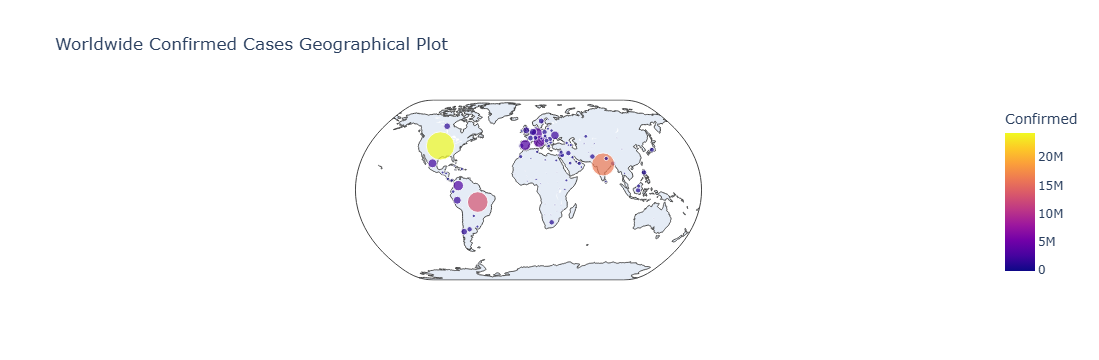

In [322]:
cntry_confirmed_plt = cntry_confirmed[["Country", "Confirmed", "ISO Alpha-3 Code"]] # extracts the relevant columns ("Country", "Confirmed" and "ISO Alpha-3 Code") as a new dataframe for the plot

# creates a geographical scatterred plot 

fig = px.scatter_geo(cntry_confirmed_plt, # the dataframe to be used for plotting
                     locations="ISO Alpha-3 Code", # specifies the column (i.e ISO Alpha-3 Code" to be used to map the data to the correct countries on the map
                     color="Confirmed", # assigns a color scale based on the number of confirmed cases
                     hover_name="ISO Alpha-3 Code", # sets the ISO code to be diplayed when hovering over a country
                     size="Confirmed", # sets the size of markers based on the number of confirmed cases -- higher numbers, larger size
                     projection="natural earth", # sets the map projection to show the world map
                     title = 'Worldwide Confirmed Cases Geographical Plot' # sets the title of the plot
                    )
fig.show() # displays the plot

##### Adding ISO Alpha-3 Codes (i.e Short Forms) to Death Cases DataFrame Based on Country Names

In [324]:
cntry_death["ISO Alpha-3 Code"] = cntry_death["Country"].map(countries.get) # creates a new column "ISO Alpha-3 Code" in the "cntry_death" that stores the Alpha 3 code for each country
cntry_death # displays the modified dataframe

,Country,Deaths,ISO Alpha-3 Code
87038,Afghanistan,2899.0,AFG
87039,Albania,2449.0,ALB
87040,Algeria,3460.0,DZA
87041,Andorra,127.0,AND
87042,Angola,757.0,AGO
...,...,...,...
87228,Vietnam,47.0,None
87229,West Bank and Gaza,3492.0,None
87230,Yemen,1319.0,YEM
87231,Zambia,1276.0,ZMB


###### Worldwide Death Cases Geographical Plot

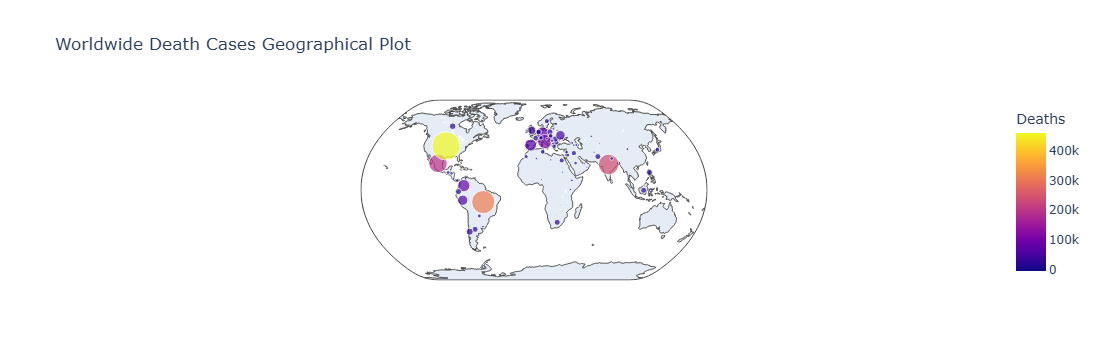

In [326]:
cntry_death_plt = cntry_death[["Country", "Deaths", "ISO Alpha-3 Code"]] # extracts the relevant columns ("Country", "Deaths" and "ISO Alpha-3 Code") as a new dataframe for the plot

# creates a geographical scatterred plot

fig = px.scatter_geo(cntry_death_plt, # the dataframe to be used for plotting
                     locations="ISO Alpha-3 Code", # specifies the column (i.e ISO Alpha-3 Code" to be used to map the data to the correct countries on the map
                     color="Deaths", # assigns a color scale based on the number of death cases
                     hover_name="ISO Alpha-3 Code", # sets the ISO code to be diplayed when hovering over a country
                     size="Deaths", # sets the size of markers based on the number of deaths cases -- higher numbers, larger size
                     projection="natural earth", # sets the map projection to show the world map
                     title = 'Worldwide Death Cases Geographical Plot' # sets the title of the plot
                    )
fig.show() # displays the plot

##### Adding ISO Alpha-3 Codes (i.e Short Forms) to Recovered Cases DataFrame Based on Country Names

In [328]:
cntry_recovered["ISO Alpha-3 Code"] = cntry_recovered["Country"].map(countries.get) # creates a new column "ISO Alpha-3 Code" in the "cntry_recovered" that stores the Alpha 3 code for each country
cntry_recovered # displays the modified dataframe

,Country,Recovered,ISO Alpha-3 Code
87038,Afghanistan,57281.0,AFG
87039,Albania,129215.0,ALB
87040,Algeria,89419.0,DZA
87041,Andorra,13416.0,AND
87042,Angola,27646.0,AGO
...,...,...,...
87228,Vietnam,2896.0,None
87229,West Bank and Gaza,300524.0,None
87230,Yemen,3399.0,YEM
87231,Zambia,91594.0,ZMB


###### Worldwide Recovered Cases Geographical Plot

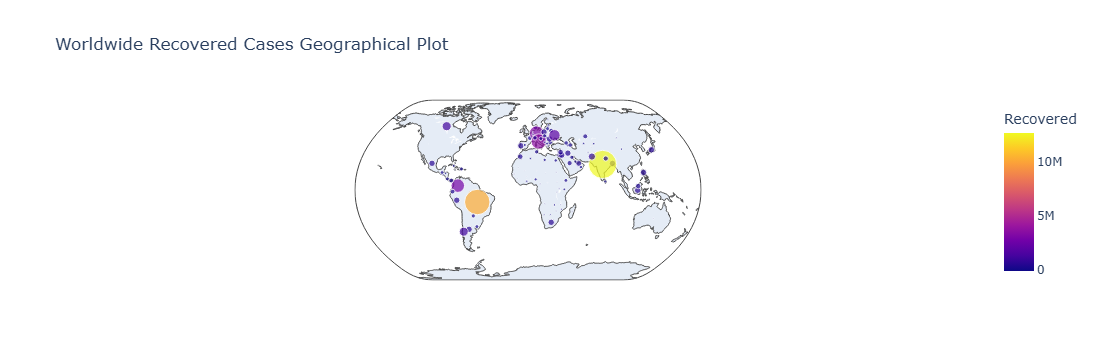

In [330]:
cntry_recovered_plt = cntry_recovered[["Country", "Recovered", "ISO Alpha-3 Code"]] # extracts the relevant columns ("Country", "Recovered" and "ISO Alpha-3 Code") as a new dataframe for the plot

# creates a geographical scatterred plot

fig = px.scatter_geo(cntry_recovered_plt, # the dataframe to be used for plotting
                     locations="ISO Alpha-3 Code", # specifies the column (i.e ISO Alpha-3 Code" to be used to map the data to the correct countries on the map
                     color="Recovered", # assigns a color scale based on the number of Recovered cases
                     hover_name="ISO Alpha-3 Code", # sets the ISO code to be diplayed when hovering over a country
                     size="Recovered", # sets the size of markers based on the number of recovered cases -- higher numbers, larger size
                     projection="natural earth", # sets the map projection to show the world map
                     title = 'Worldwide Recovered Cases Geographical Plot' # sets the title of the plot
                    )
fig.show() # displays the plot

### Data Encoding
To  encode non-numerical columns in the DataFrame, 
Label encoding was applied to categorical columns (`dtype: object`) in the DataFrame. Special handling was used for the `Province` and `Country` column. Values in the `Province` column that were initially filled with the corresponding `Country` name were encoded with the same number as the `Country` values to maintain consistency. This ensures that identical values across these columns receive the same numerical encoding. All other categorical values were encoded normally. This approach guarantees uniform representation for related entries and supports effective data processing.


In [332]:
df2 = df.copy() # creates copy of the main dataframe for encoding purposes

In [333]:
encoder = LabelEncoder() # initializes the label encoder

categorical_cols = df2.select_dtypes(include=['object']).columns # identifies categorical columns

mapping = {} # creates a mapping dictionary to ensure consistent encoding

# iterates through each categorical column to process special cases
for col in categorical_cols:
    if col in ['Province', 'Country']:
        
        unique_values = df2[col].unique() # gets unique values for the current column
        
        # if the column is 'Province' or 'Country', ensure consistent encoding
        for value in unique_values:
            if value not in mapping:
                mapping[value] = len(mapping) # assigns a new label for unique values not in the mapping
    
   
    df2[col] = df2[col].map(mapping)  # applies the label encoding to the column by overwriting it's previous value with the encoded number


In [334]:
sno_values = df2['SNo'].iloc[35:38].tolist() # selects entries for a specific range using the "SNo" column

filtered_df = df2[df['SNo'].isin(sno_values)] # filters the DataFrame to show only these rows

In [335]:
filtered_df # displays the filtered dataframe to confirm encoding.

,SNo,Province,Country,Confirmed,Deaths,Recovered
Date,,,,,,
2020-01-22,36,32,32,2.0,0.0,0.0
2020-01-22,37,33,33,4.0,0.0,2.0
2020-01-22,38,34,34,1.0,0.0,0.0


### Feature Relationships
This section utilizes a correlation matrix to display the relationships between various features in the DataFrame(s). A correlation matrix is a table of correlation coefficients between variables, with values ranging from -1 to 1. It helps identify the strength and direction of relationships between features, where positive values indicate a direct relationship and negative values suggest an inverse relationship. This analysis provides insights into feature dependencies or redundancies in the dataset.

**Note:** The strength of the correlation can be interpreted as follows: stronger correlations are represented by values closer to 1 or -1, often shown in deeper green for positive correlations and deeper red for negative correlations. Weaker correlations, closer to 0, are represented by lighter colors.

#### Correlation Matrix Heatmap with Matplotlib 

Text(0.5, 1.0, 'Correlation Heat Map of COVID-19 Cases Between 2020 and 2021')

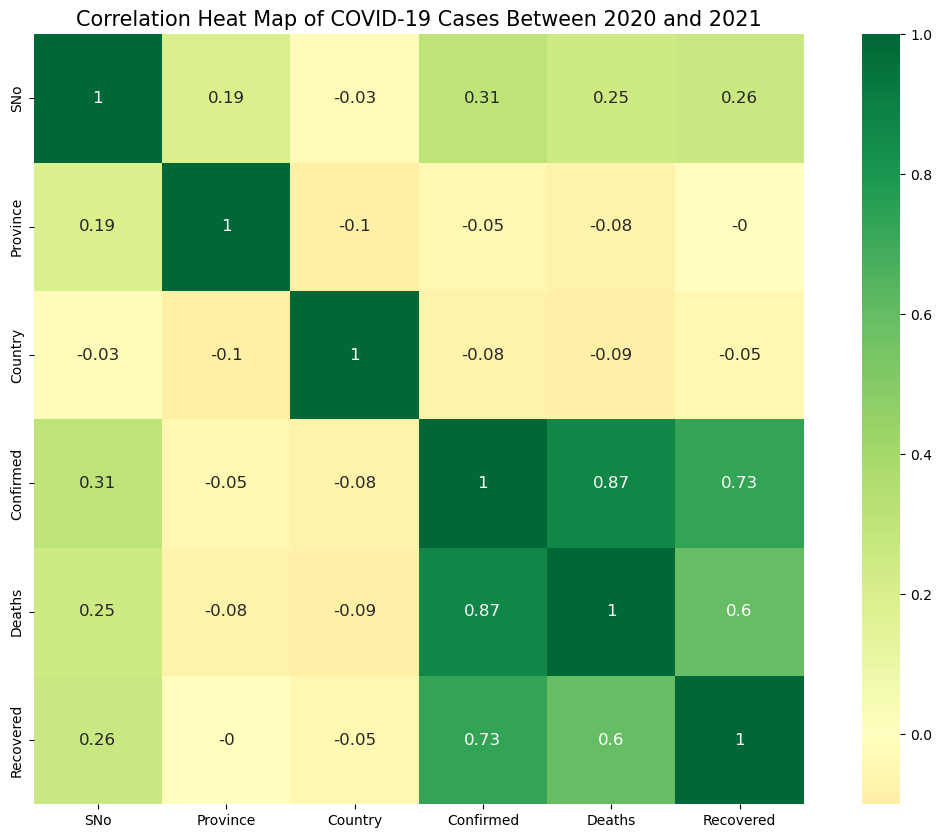

In [338]:

plt.figure(figsize = (15, 10)) # specifies the dimension of the correlation matrix heatmap

correlation_plot = sns.heatmap(df2.corr().round(2), 
                               annot=True, cmap='RdYlGn', 
                               center=0, 
                               square=True, 
                               annot_kws={"size": 12} # adjusts the size of the numbers in the boxes
                              ) # plots the correlation matrix as a heatmap for dataset

correlation_plot.set_title("Correlation Heat Map of COVID-19 Cases Between 2020 and 2021", fontsize = 15) # specifies the title of the matrix and the fontsize

##### Observation

From the Correlation Matrix, the following insights were observed for the period between January 2020 and May 2021:

- **Confirmed Cases and Death Cases:** A strong correlation was observed, indicating a significant relationship between the number of confirmed cases and death cases of COVID-19.
- **Confirmed Cases and Recovered Cases:** These two metrics showed a strong correlation, reflecting a notable connection between confirmed and recovered cases.
- **Death Cases and Recovered Cases:** A strong correlation was found, suggesting a robust relationship between death cases and recovered cases.
- **Province and Death Cases:** There was a weak correlation between the province and death cases, indicating minimal association.
- **Province and Confirmed Cases:** The correlation between province and confirmed cases was weak, showing a limited relationship.
- **Province and Recovered Cases:** A weak correlation was observed between the province and recovered cases, indicating a minor association.
- **Country and Recovered Cases:** A weak correlation was noted between country and recovered cases, suggesting a slight connection.
- **Country and Death Cases:** The correlation between country and death cases was weak, reflecting minimal association.
- **Country and Confirmed Cases:** A weak correlation was observed between country and confirmed cases, indicating a limited relationship.

... and so on.


### Saving the Cleaned Dataset

In [341]:
df.to_csv("Cleaned_Dataset.csv")

### Data Preprocessing for COVID-19 Death Cases by Country and Province

To forecast COVID-19 death cases, data preprocessing will be performed to remove unnecessary columns, specifically `Last Update`, `Confirmed`, and `Recovered`. The data will then be grouped by `Province` and `Country` to focus solely on death cases, ensuring the forecast is based on relevant columns.


In [343]:
death_cases = df.drop(["SNo", "Confirmed", "Recovered"], axis =1) # removes "Last Update", "Confirmed" and "Recovered" Columns from the dataframe.
death_cases.reset_index(inplace = True) # moves the index (initially date) to a new column, making it part of the DataFrame

In [344]:
death_cases.head() # displays the information for the first 5 death cases.

,Date,Province,Country,Deaths
0,2020-01-22,Anhui,China,0.0
1,2020-01-22,Beijing,China,0.0
2,2020-01-22,Chongqing,China,0.0
3,2020-01-22,Fujian,China,0.0
4,2020-01-22,Gansu,China,0.0


### Feature and Target Definition

From time series analysis, the primary **feature ("ds")** is time itself. This feature captures patterns such as holidays and seasonality, which can influence the number of COVID-19 deaths.

In this analysis, the **features** are the independent variables used to forecast the **target** variable. The feature includes time, which helps the model understand patterns that affect future death counts.

The **target variable ("y")** is the dependent variable that the model aims to predict. In this case, it is the `Deaths` column, which quantifies the number of COVID-19 death cases. The objective of this analysis is to forecast future COVID-19 death cases using historical data, by country and province-level.



In [346]:
X = death_cases["Date"]  # extracts date as the feature / independent variable 
Y = death_cases['Deaths']  # extracts deaths as the target / dependent variable 

### Train-Test Split
Given the time-dependent nature of the COVID-19 dataset, the common approach of using `train_test_split` which randomly shuffles and splits the data is unsuitable. Preserving the temporal sequence is essential for accurate prediction, as shuffling disrupts the time-based relationships in the data. Instead, time series data should be split chronologically. The earlier portion of the data is typically used for training, while the more recent portion is reserved for testing. This approach ensures the integrity of the time-series data is maintained for forecasting tasks.

To split the dataset into training and testing sets, both `X` and `Y` need to be combined into a single DataFrame. This combined DataFrame can then be split into training and testing sets based on the specified dates, ensuring that the time-dependent structure of the data is preserved.



##### Note:

The dataset was split into training and testing sets with an approximate ratio of 70:30. Specifically, the first 70% of the entries were used for training, while the remaining 30% were allocated for testing. This approach ensures that the model is trained on a substantial portion of the data while retaining a significant amount for evaluation.


In [349]:
# train - test split
train_data = death_cases.loc[death_cases["Date"] < "2021-01-29"] # sets train dataset to all cases recorded before "2021-01-29"
test_data = death_cases.loc[death_cases["Date"] >= "2021-01-29"] # sets test dataset to all cases recorded on or after "2021-01-29"

In [350]:
train_data.head() # displays first 5 recorded cases for the training data

,Date,Province,Country,Deaths
0,2020-01-22,Anhui,China,0.0
1,2020-01-22,Beijing,China,0.0
2,2020-01-22,Chongqing,China,0.0
3,2020-01-22,Fujian,China,0.0
4,2020-01-22,Gansu,China,0.0


In [351]:
test_data.head() # displays first 5 recorded cases for the test data

,Date,Province,Country,Deaths
213864,2021-01-29,Afghanistan,Afghanistan,2399.0
213865,2021-01-29,Albania,Albania,1358.0
213866,2021-01-29,Algeria,Algeria,2884.0
213867,2021-01-29,Andorra,Andorra,100.0
213868,2021-01-29,Angola,Angola,464.0


In [352]:
print(train_data.shape, test_data.shape) # prints the shape of the train and test datasets

(213864, 4) (92565, 4)


### Feature Scaling
For time series algorithms like **ARIMA** and **Prophet**, feature scaling is not required. Both models are designed to handle time series data effectively without the need to scale the features. These models work with the inherent structure of time series data, allowing them to capture trends, seasonality, and patterns directly from the raw data.



### Time Series Regression Analysis

The next step involves perfoingntimems Siesef Forecasting using **Prophet**, a powerful forecasting tool designed for time series data. Unlike traditional regression analysis, which models relationships between dependent and independent variables, Prophet is tailored for forecasting data that exhibits patterns over time, such as trends, seasonality, and holidays.

For predicting future **death cases**, Prophet is ideal due to its flexibility in handling missing data, seasonal fluctuations, and outliers, making it well-suited for real-world datasets with irregularities. By fitting a model that adapts to the time-dependent patterns in the data, Prophet provides accurate forecasts, helping to anticipate trends in death cases over time. This forecasting is crucial for public health planning, enabling stakeholders to make proactive decisions based on expected future outcomes.


#### Building the Prophet Model for Forecasting 

In [356]:
forecast_dfs = [] # initializes an empty list to store the forecasts for all countries and provinces
counter = 0 # counter to print a snippet of the "'result_test_df" only once during the training period

for country in unique_countries:
    try:
        assert(country in death_cases["Country"].values) # confirms that the current country is in "Country" column of the "death_cases" dataframe
        print(f"{country} is listed") # prints a confirmation that the country is listed
        country_deaths = death_cases[(death_cases["Country"] == country)] # filters out death cases from "death_cases" dataframe for the current country 
        country_tuple = ("Deaths", country_deaths) # creates a tuple that contains the case (i.e deaths) and the dataframe
        country_provinces = country_deaths["Province"].unique() # gets the list of all provinces in the current country

        for province in country_provinces:
            try:
                provinces_df = [] # list to store forecast for death cases in the province
                
                assert(province in death_cases["Province"].values) # confirms that the current province is in the "death_cases" dataframe
                case = country_tuple[0] # extracts the case type (i.e deaths) from the "country_tuple" tuple
                country_df = country_tuple[1] # extracts the corresponding dataframe (i.e country_deaths) for the case type (i.e deaths) from the "country_tuple" tuple
                province_df = country_df[(country_df["Province"] == province)] # filters out death cases from "country_df" dataframe for the current province
                province_df = province_df[["Date", case]] # selects the relevant columns (i.e Date and Deaths)
                province_df.columns = ["ds", "y"] # renames the columns to match prophet's requirements -- feature "ds" and target "y"
                assert pd.api.types.is_datetime64_any_dtype(province_df["ds"]), "The 'ds' column should be of datetime type" # confirms that the "ds" column (i.e Date) is a datetime64 type else raises an exception error
                
                # train - test split

                # train_data = province_df.loc[(province_df["ds"] < pd.to_datetime("2021-01-29"))] # sets train dataset to all cases recorded before "2021-01-29"
                # test_data = province_df.loc[(province_df["ds"] >= pd.to_datetime("2021-01-29"))] # sets test dataset to all cases recorded on or after "2021-01-29"


                # Calculate the absolute number of rows for 70% of the total length of the data
                train_size = round(0.7 * len(province_df))  # Ensure train_size is a whole number
                
                # Sort the data by date (if not already sorted) to ensure sequential splitting
                province_df = province_df.sort_values(by="ds")
                
                # Sequential train-test split: First 70% for training, remaining 30% for testing
                train_data = province_df.iloc[:train_size]  # First 70% rows for train
                test_data = province_df.iloc[train_size:]   # Remaining 30% rows for test
                

                first_date = test_data["ds"].iloc[0].strftime('%Y-%m-%d')


                # intializes the prophet model algorithm for training
                model = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = False) # initializing with custom settings for the hyperparameters
                model.add_seasonality(name = "monthly", period = 30.5, fourier_order = 10) # adds monthly seasonality
                model.add_seasonality(name = "weekly", period = 7, fourier_order = 21) # adds weekly seasonality
                model.add_seasonality(name = "daily", period = 1, fourier_order = 3) # adds daily seasonility

                # performs the training process
                
                model.fit(train_data) # starts training by fitting the prophet model to the train data
                future = model.make_future_dataframe(periods = 7) # creates a future dataframe for seven days (i.e the periods)
                forecast = model.predict(future) # predicts the future values for those seven days
                forecast_df = forecast[["ds", "yhat"]] # extracts the relevant columns
            
                # NOTE: Prophet will automatically include other columns during the training process. The forecast_df will also include the train data the model learned from before forecasting    
                
                result_df = forecast_df[(forecast_df["ds"] >= pd.to_datetime(first_date))] # filters the "forecast_df" to extract only the forecasted rows 

                # NOTE: remember "forecast_df" had both the train and the forecasted values initially, that is why we are extracting only the forecasted values above
                
                result_test_df = result_df.merge(test_data, on = ["ds"]) # merge forecast results with the test data

                # NOTE: this merging operation will only merge values in the test data whose dates match with those in the forecasted results

                result_test_df["abs_error"] = (result_test_df["y"] - result_test_df["yhat"]).abs() # computes the absolute errors

                if counter == 1:
                    print(f" Snippet for test_result: {result_test_df}")
                    
                counter += 1

                result_test_df["Province"] = province # creates a new column called "Province" in the "forecast_df" dataframe and adds the name of the current province to all rows in the "Province" column
                result_test_df["Country"] = country # creates a new column called "Country" in the "forecast_df" dataframe and adds the name of the current country to all rows in the "Province" column
                result_test_df.rename(columns = {"y" : "Deaths", "yhat" : "Forecasted Deaths"}, inplace = True) # renames "yhat" column to case (i.e Deaths)
                # provinces_df += [forecast_df.tail(7)] # extracts the last  7 rows (i.e the forecasted values) and adds them to the "provinces_df" list

                provinces_df += [result_test_df] # extracts the last  7 rows (i.e the forecasted values) and adds them to the "provinces_df" list

                # NOTE: remember "forecast_df" had both the train and the forecasted values initially, that is whty we are extracting the last 7 rows
                
                forecast_dfs += [provinces_df] # adds the provinces df list to the forecast_df list

            except Exception as e:
                print(e)
    except:
        
        print(f"{country} is NOT listed") # message to be displayed for if an error is encountered
        continue       




China is listed


17:42:41 - cmdstanpy - INFO - Chain [1] start processing
17:42:41 - cmdstanpy - INFO - Chain [1] done processing
17:42:42 - cmdstanpy - INFO - Chain [1] start processing
17:42:42 - cmdstanpy - INFO - Chain [1] done processing


 Snippet for test_result:           ds      yhat    y  abs_error
0 2021-01-02  9.153633  9.0   0.153633
1 2021-01-03  9.109572  9.0   0.109572
2 2021-01-04  9.062747  9.0   0.062747
3 2021-01-05  9.030796  9.0   0.030796
4 2021-01-06  8.976640  9.0   0.023360
5 2021-01-07  8.940963  9.0   0.059037
6 2021-01-08  8.983602  9.0   0.016398


17:42:43 - cmdstanpy - INFO - Chain [1] start processing
17:42:43 - cmdstanpy - INFO - Chain [1] done processing
17:42:44 - cmdstanpy - INFO - Chain [1] start processing
17:42:44 - cmdstanpy - INFO - Chain [1] done processing
17:42:45 - cmdstanpy - INFO - Chain [1] start processing
17:42:45 - cmdstanpy - INFO - Chain [1] done processing
17:42:46 - cmdstanpy - INFO - Chain [1] start processing
17:42:47 - cmdstanpy - INFO - Chain [1] done processing
17:42:48 - cmdstanpy - INFO - Chain [1] start processing
17:42:48 - cmdstanpy - INFO - Chain [1] done processing
17:42:49 - cmdstanpy - INFO - Chain [1] start processing
17:42:49 - cmdstanpy - INFO - Chain [1] done processing
17:42:50 - cmdstanpy - INFO - Chain [1] start processing
17:42:51 - cmdstanpy - INFO - Chain [1] done processing
17:42:51 - cmdstanpy - INFO - Chain [1] start processing
17:42:51 - cmdstanpy - INFO - Chain [1] done processing
17:42:52 - cmdstanpy - INFO - Chain [1] start processing
17:42:52 - cmdstanpy - INFO - Chain [1]

Hong Kong is listed


17:43:04 - cmdstanpy - INFO - Chain [1] start processing
17:43:04 - cmdstanpy - INFO - Chain [1] done processing


Macau is listed
Taiwan is listed


17:43:05 - cmdstanpy - INFO - Chain [1] start processing
17:43:06 - cmdstanpy - INFO - Chain [1] done processing


United States is listed


17:43:06 - cmdstanpy - INFO - Chain [1] start processing
17:43:08 - cmdstanpy - INFO - Chain [1] done processing


single positional indexer is out-of-bounds


17:43:08 - cmdstanpy - INFO - Chain [1] start processing
17:43:09 - cmdstanpy - INFO - Chain [1] done processing
17:43:09 - cmdstanpy - INFO - Chain [1] start processing
17:43:10 - cmdstanpy - INFO - Chain [1] done processing
17:43:11 - cmdstanpy - INFO - Chain [1] start processing
17:43:11 - cmdstanpy - INFO - Chain [1] done processing


single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


17:43:17 - cmdstanpy - INFO - Chain [1] start processing
17:43:18 - cmdstanpy - INFO - Chain [1] done processing
17:43:19 - cmdstanpy - INFO - Chain [1] start processing
17:43:20 - cmdstanpy - INFO - Chain [1] done processing
17:43:21 - cmdstanpy - INFO - Chain [1] start processing
17:43:23 - cmdstanpy - INFO - Chain [1] done processing


single positional indexer is out-of-bounds


17:43:32 - cmdstanpy - INFO - Chain [1] start processing
17:43:33 - cmdstanpy - INFO - Chain [1] done processing


Dataframe has less than 2 non-NaN rows.
single positional indexer is out-of-bounds


17:43:47 - cmdstanpy - INFO - Chain [1] start processing
17:43:49 - cmdstanpy - INFO - Chain [1] done processing


single positional indexer is out-of-bounds
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN rows.
Dataframe has less than 2 non-NaN row

17:44:13 - cmdstanpy - INFO - Chain [1] start processing
17:44:13 - cmdstanpy - INFO - Chain [1] done processing
17:44:14 - cmdstanpy - INFO - Chain [1] start processing
17:44:14 - cmdstanpy - INFO - Chain [1] done processing
17:44:15 - cmdstanpy - INFO - Chain [1] start processing
17:44:16 - cmdstanpy - INFO - Chain [1] done processing
17:44:17 - cmdstanpy - INFO - Chain [1] start processing
17:44:17 - cmdstanpy - INFO - Chain [1] done processing
17:44:18 - cmdstanpy - INFO - Chain [1] start processing
17:44:18 - cmdstanpy - INFO - Chain [1] done processing
17:44:19 - cmdstanpy - INFO - Chain [1] start processing
17:44:20 - cmdstanpy - INFO - Chain [1] done processing
17:44:20 - cmdstanpy - INFO - Chain [1] start processing
17:44:21 - cmdstanpy - INFO - Chain [1] done processing
17:44:22 - cmdstanpy - INFO - Chain [1] start processing
17:44:22 - cmdstanpy - INFO - Chain [1] done processing
17:44:23 - cmdstanpy - INFO - Chain [1] start processing
17:44:23 - cmdstanpy - INFO - Chain [1]

Dataframe has less than 2 non-NaN rows.


17:45:13 - cmdstanpy - INFO - Chain [1] start processing
17:45:14 - cmdstanpy - INFO - Chain [1] done processing
17:45:14 - cmdstanpy - INFO - Chain [1] start processing
17:45:15 - cmdstanpy - INFO - Chain [1] done processing
17:45:16 - cmdstanpy - INFO - Chain [1] start processing
17:45:16 - cmdstanpy - INFO - Chain [1] done processing


single positional indexer is out-of-bounds
Japan is listed


17:45:17 - cmdstanpy - INFO - Chain [1] start processing
17:45:18 - cmdstanpy - INFO - Chain [1] done processing
17:45:18 - cmdstanpy - INFO - Chain [1] start processing
17:45:19 - cmdstanpy - INFO - Chain [1] done processing
17:45:20 - cmdstanpy - INFO - Chain [1] start processing
17:45:20 - cmdstanpy - INFO - Chain [1] done processing
17:45:21 - cmdstanpy - INFO - Chain [1] start processing
17:45:21 - cmdstanpy - INFO - Chain [1] done processing
17:45:22 - cmdstanpy - INFO - Chain [1] start processing
17:45:23 - cmdstanpy - INFO - Chain [1] done processing
17:45:24 - cmdstanpy - INFO - Chain [1] start processing
17:45:24 - cmdstanpy - INFO - Chain [1] done processing
17:45:25 - cmdstanpy - INFO - Chain [1] start processing
17:45:25 - cmdstanpy - INFO - Chain [1] done processing
17:45:25 - cmdstanpy - INFO - Chain [1] start processing
17:45:26 - cmdstanpy - INFO - Chain [1] done processing
17:45:26 - cmdstanpy - INFO - Chain [1] start processing
17:45:27 - cmdstanpy - INFO - Chain [1]

Thailand is listed


17:46:08 - cmdstanpy - INFO - Chain [1] start processing
17:46:09 - cmdstanpy - INFO - Chain [1] done processing


South Korea is listed


17:46:09 - cmdstanpy - INFO - Chain [1] start processing
17:46:10 - cmdstanpy - INFO - Chain [1] done processing


Kiribati is listed
Singapore is listed


17:46:11 - cmdstanpy - INFO - Chain [1] start processing
17:46:11 - cmdstanpy - INFO - Chain [1] done processing


Philippines is listed


17:46:12 - cmdstanpy - INFO - Chain [1] start processing
17:46:12 - cmdstanpy - INFO - Chain [1] done processing


Malaysia is listed


17:46:13 - cmdstanpy - INFO - Chain [1] start processing
17:46:14 - cmdstanpy - INFO - Chain [1] done processing


Vietnam is listed


17:46:15 - cmdstanpy - INFO - Chain [1] start processing
17:46:16 - cmdstanpy - INFO - Chain [1] done processing


Australia is listed


17:46:17 - cmdstanpy - INFO - Chain [1] start processing
17:46:17 - cmdstanpy - INFO - Chain [1] done processing
17:46:17 - cmdstanpy - INFO - Chain [1] start processing
17:46:19 - cmdstanpy - INFO - Chain [1] done processing
17:46:19 - cmdstanpy - INFO - Chain [1] start processing
17:46:19 - cmdstanpy - INFO - Chain [1] done processing
17:46:20 - cmdstanpy - INFO - Chain [1] start processing
17:46:20 - cmdstanpy - INFO - Chain [1] done processing
17:46:21 - cmdstanpy - INFO - Chain [1] start processing
17:46:21 - cmdstanpy - INFO - Chain [1] done processing
17:46:22 - cmdstanpy - INFO - Chain [1] start processing
17:46:22 - cmdstanpy - INFO - Chain [1] done processing
17:46:23 - cmdstanpy - INFO - Chain [1] start processing
17:46:23 - cmdstanpy - INFO - Chain [1] done processing


single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
Mexico is listed


17:46:24 - cmdstanpy - INFO - Chain [1] start processing
17:46:24 - cmdstanpy - INFO - Chain [1] done processing
17:46:25 - cmdstanpy - INFO - Chain [1] start processing
17:46:25 - cmdstanpy - INFO - Chain [1] done processing
17:46:26 - cmdstanpy - INFO - Chain [1] start processing
17:46:26 - cmdstanpy - INFO - Chain [1] done processing
17:46:26 - cmdstanpy - INFO - Chain [1] start processing
17:46:27 - cmdstanpy - INFO - Chain [1] done processing
17:46:28 - cmdstanpy - INFO - Chain [1] start processing
17:46:29 - cmdstanpy - INFO - Chain [1] done processing
17:46:29 - cmdstanpy - INFO - Chain [1] start processing
17:46:30 - cmdstanpy - INFO - Chain [1] done processing
17:46:30 - cmdstanpy - INFO - Chain [1] start processing
17:46:31 - cmdstanpy - INFO - Chain [1] done processing
17:46:31 - cmdstanpy - INFO - Chain [1] start processing
17:46:31 - cmdstanpy - INFO - Chain [1] done processing
17:46:32 - cmdstanpy - INFO - Chain [1] start processing
17:46:32 - cmdstanpy - INFO - Chain [1]

Brazil is listed


17:46:53 - cmdstanpy - INFO - Chain [1] start processing
17:46:57 - cmdstanpy - INFO - Chain [1] done processing
17:46:57 - cmdstanpy - INFO - Chain [1] start processing
17:46:58 - cmdstanpy - INFO - Chain [1] done processing
17:46:58 - cmdstanpy - INFO - Chain [1] start processing
17:46:59 - cmdstanpy - INFO - Chain [1] done processing
17:46:59 - cmdstanpy - INFO - Chain [1] start processing
17:47:00 - cmdstanpy - INFO - Chain [1] done processing
17:47:00 - cmdstanpy - INFO - Chain [1] start processing
17:47:01 - cmdstanpy - INFO - Chain [1] done processing
17:47:01 - cmdstanpy - INFO - Chain [1] start processing
17:47:02 - cmdstanpy - INFO - Chain [1] done processing
17:47:02 - cmdstanpy - INFO - Chain [1] start processing
17:47:03 - cmdstanpy - INFO - Chain [1] done processing
17:47:04 - cmdstanpy - INFO - Chain [1] start processing
17:47:05 - cmdstanpy - INFO - Chain [1] done processing
17:47:06 - cmdstanpy - INFO - Chain [1] start processing
17:47:06 - cmdstanpy - INFO - Chain [1]

Colombia is listed


17:47:33 - cmdstanpy - INFO - Chain [1] start processing
17:47:33 - cmdstanpy - INFO - Chain [1] done processing
17:47:34 - cmdstanpy - INFO - Chain [1] start processing
17:47:34 - cmdstanpy - INFO - Chain [1] done processing
17:47:35 - cmdstanpy - INFO - Chain [1] start processing
17:47:36 - cmdstanpy - INFO - Chain [1] done processing
17:47:36 - cmdstanpy - INFO - Chain [1] start processing
17:47:37 - cmdstanpy - INFO - Chain [1] done processing
17:47:37 - cmdstanpy - INFO - Chain [1] start processing
17:47:38 - cmdstanpy - INFO - Chain [1] done processing
17:47:39 - cmdstanpy - INFO - Chain [1] start processing
17:47:40 - cmdstanpy - INFO - Chain [1] done processing
17:47:40 - cmdstanpy - INFO - Chain [1] start processing
17:47:41 - cmdstanpy - INFO - Chain [1] done processing
17:47:41 - cmdstanpy - INFO - Chain [1] start processing
17:47:42 - cmdstanpy - INFO - Chain [1] done processing
17:47:43 - cmdstanpy - INFO - Chain [1] start processing
17:47:43 - cmdstanpy - INFO - Chain [1]

France is listed


17:48:16 - cmdstanpy - INFO - Chain [1] start processing
17:48:16 - cmdstanpy - INFO - Chain [1] done processing
17:48:17 - cmdstanpy - INFO - Chain [1] start processing
17:48:17 - cmdstanpy - INFO - Chain [1] done processing
17:48:18 - cmdstanpy - INFO - Chain [1] start processing
17:48:18 - cmdstanpy - INFO - Chain [1] done processing
17:48:18 - cmdstanpy - INFO - Chain [1] start processing
17:48:19 - cmdstanpy - INFO - Chain [1] done processing


single positional indexer is out-of-bounds


17:48:19 - cmdstanpy - INFO - Chain [1] start processing
17:48:20 - cmdstanpy - INFO - Chain [1] done processing
17:48:20 - cmdstanpy - INFO - Chain [1] start processing
17:48:21 - cmdstanpy - INFO - Chain [1] done processing
17:48:22 - cmdstanpy - INFO - Chain [1] start processing
17:48:23 - cmdstanpy - INFO - Chain [1] done processing
17:48:24 - cmdstanpy - INFO - Chain [1] start processing
17:48:24 - cmdstanpy - INFO - Chain [1] done processing
17:48:26 - cmdstanpy - INFO - Chain [1] start processing
17:48:27 - cmdstanpy - INFO - Chain [1] done processing
17:48:28 - cmdstanpy - INFO - Chain [1] start processing
17:48:28 - cmdstanpy - INFO - Chain [1] done processing


Nepal is listed


17:48:29 - cmdstanpy - INFO - Chain [1] start processing
17:48:30 - cmdstanpy - INFO - Chain [1] done processing


Canada is listed


17:48:30 - cmdstanpy - INFO - Chain [1] start processing
17:48:31 - cmdstanpy - INFO - Chain [1] done processing
17:48:31 - cmdstanpy - INFO - Chain [1] start processing
17:48:32 - cmdstanpy - INFO - Chain [1] done processing


Dataframe has less than 2 non-NaN rows.


17:48:34 - cmdstanpy - INFO - Chain [1] start processing
17:48:34 - cmdstanpy - INFO - Chain [1] done processing
17:48:35 - cmdstanpy - INFO - Chain [1] start processing
17:48:36 - cmdstanpy - INFO - Chain [1] done processing
17:48:37 - cmdstanpy - INFO - Chain [1] start processing
17:48:37 - cmdstanpy - INFO - Chain [1] done processing
17:48:38 - cmdstanpy - INFO - Chain [1] start processing
17:48:38 - cmdstanpy - INFO - Chain [1] done processing
17:48:38 - cmdstanpy - INFO - Chain [1] start processing
17:48:39 - cmdstanpy - INFO - Chain [1] done processing
17:48:40 - cmdstanpy - INFO - Chain [1] start processing
17:48:40 - cmdstanpy - INFO - Chain [1] done processing
17:48:41 - cmdstanpy - INFO - Chain [1] start processing
17:48:41 - cmdstanpy - INFO - Chain [1] done processing
17:48:42 - cmdstanpy - INFO - Chain [1] start processing
17:48:43 - cmdstanpy - INFO - Chain [1] done processing
17:48:47 - cmdstanpy - INFO - Chain [1] start processing
17:48:48 - cmdstanpy - INFO - Chain [1]

Cambodia is listed
Sri Lanka is listed


17:49:02 - cmdstanpy - INFO - Chain [1] start processing
17:49:03 - cmdstanpy - INFO - Chain [1] done processing


Ivory Coast is listed


17:49:05 - cmdstanpy - INFO - Chain [1] start processing
17:49:06 - cmdstanpy - INFO - Chain [1] done processing


Germany is listed


17:49:08 - cmdstanpy - INFO - Chain [1] start processing
17:49:09 - cmdstanpy - INFO - Chain [1] done processing
17:49:10 - cmdstanpy - INFO - Chain [1] start processing
17:49:11 - cmdstanpy - INFO - Chain [1] done processing
17:49:14 - cmdstanpy - INFO - Chain [1] start processing
17:49:15 - cmdstanpy - INFO - Chain [1] done processing
17:49:17 - cmdstanpy - INFO - Chain [1] start processing
17:49:18 - cmdstanpy - INFO - Chain [1] done processing
17:49:19 - cmdstanpy - INFO - Chain [1] start processing
17:49:19 - cmdstanpy - INFO - Chain [1] done processing
17:49:21 - cmdstanpy - INFO - Chain [1] start processing
17:49:24 - cmdstanpy - INFO - Chain [1] done processing
17:49:25 - cmdstanpy - INFO - Chain [1] start processing
17:49:26 - cmdstanpy - INFO - Chain [1] done processing
17:49:27 - cmdstanpy - INFO - Chain [1] start processing
17:49:28 - cmdstanpy - INFO - Chain [1] done processing
17:49:29 - cmdstanpy - INFO - Chain [1] start processing
17:49:29 - cmdstanpy - INFO - Chain [1]

Finland is listed


17:49:39 - cmdstanpy - INFO - Chain [1] start processing
17:49:40 - cmdstanpy - INFO - Chain [1] done processing


United Arab Emirates is listed


17:49:40 - cmdstanpy - INFO - Chain [1] start processing
17:49:42 - cmdstanpy - INFO - Chain [1] done processing


India is listed


17:49:43 - cmdstanpy - INFO - Chain [1] start processing
17:49:43 - cmdstanpy - INFO - Chain [1] done processing
17:49:43 - cmdstanpy - INFO - Chain [1] start processing
17:49:44 - cmdstanpy - INFO - Chain [1] done processing
17:49:45 - cmdstanpy - INFO - Chain [1] start processing
17:49:46 - cmdstanpy - INFO - Chain [1] done processing
17:49:47 - cmdstanpy - INFO - Chain [1] start processing
17:49:47 - cmdstanpy - INFO - Chain [1] done processing
17:49:48 - cmdstanpy - INFO - Chain [1] start processing
17:49:49 - cmdstanpy - INFO - Chain [1] done processing
17:49:50 - cmdstanpy - INFO - Chain [1] start processing
17:49:50 - cmdstanpy - INFO - Chain [1] done processing
17:49:51 - cmdstanpy - INFO - Chain [1] start processing
17:49:52 - cmdstanpy - INFO - Chain [1] done processing
17:49:52 - cmdstanpy - INFO - Chain [1] start processing
17:49:53 - cmdstanpy - INFO - Chain [1] done processing


single positional indexer is out-of-bounds


17:49:53 - cmdstanpy - INFO - Chain [1] start processing
17:49:54 - cmdstanpy - INFO - Chain [1] done processing
17:49:55 - cmdstanpy - INFO - Chain [1] start processing
17:49:55 - cmdstanpy - INFO - Chain [1] done processing
17:49:56 - cmdstanpy - INFO - Chain [1] start processing
17:49:57 - cmdstanpy - INFO - Chain [1] done processing
17:49:58 - cmdstanpy - INFO - Chain [1] start processing
17:49:59 - cmdstanpy - INFO - Chain [1] done processing
17:50:00 - cmdstanpy - INFO - Chain [1] start processing
17:50:01 - cmdstanpy - INFO - Chain [1] done processing
17:50:02 - cmdstanpy - INFO - Chain [1] start processing
17:50:02 - cmdstanpy - INFO - Chain [1] done processing
17:50:03 - cmdstanpy - INFO - Chain [1] start processing
17:50:04 - cmdstanpy - INFO - Chain [1] done processing
17:50:05 - cmdstanpy - INFO - Chain [1] start processing
17:50:07 - cmdstanpy - INFO - Chain [1] done processing
17:50:07 - cmdstanpy - INFO - Chain [1] start processing
17:50:08 - cmdstanpy - INFO - Chain [1]

Italy is listed


17:50:31 - cmdstanpy - INFO - Chain [1] start processing
17:50:36 - cmdstanpy - INFO - Chain [1] done processing
17:50:36 - cmdstanpy - INFO - Chain [1] start processing
17:50:37 - cmdstanpy - INFO - Chain [1] done processing
17:50:37 - cmdstanpy - INFO - Chain [1] start processing
17:50:37 - cmdstanpy - INFO - Chain [1] done processing
17:50:38 - cmdstanpy - INFO - Chain [1] start processing
17:50:39 - cmdstanpy - INFO - Chain [1] done processing
17:50:40 - cmdstanpy - INFO - Chain [1] start processing
17:50:40 - cmdstanpy - INFO - Chain [1] done processing
17:50:41 - cmdstanpy - INFO - Chain [1] start processing
17:50:41 - cmdstanpy - INFO - Chain [1] done processing
17:50:42 - cmdstanpy - INFO - Chain [1] start processing
17:50:43 - cmdstanpy - INFO - Chain [1] done processing
17:50:43 - cmdstanpy - INFO - Chain [1] start processing
17:50:44 - cmdstanpy - INFO - Chain [1] done processing
17:50:44 - cmdstanpy - INFO - Chain [1] start processing
17:50:45 - cmdstanpy - INFO - Chain [1]

United Kingdom is listed


17:50:55 - cmdstanpy - INFO - Chain [1] done processing
17:50:55 - cmdstanpy - INFO - Chain [1] start processing


Dataframe has less than 2 non-NaN rows.


17:50:56 - cmdstanpy - INFO - Chain [1] done processing
17:50:56 - cmdstanpy - INFO - Chain [1] start processing
17:50:56 - cmdstanpy - INFO - Chain [1] done processing
17:50:56 - cmdstanpy - INFO - Chain [1] start processing
17:50:57 - cmdstanpy - INFO - Chain [1] done processing
17:50:57 - cmdstanpy - INFO - Chain [1] start processing
17:50:57 - cmdstanpy - INFO - Chain [1] done processing
17:50:57 - cmdstanpy - INFO - Chain [1] start processing
17:50:58 - cmdstanpy - INFO - Chain [1] done processing
17:50:58 - cmdstanpy - INFO - Chain [1] start processing
17:50:58 - cmdstanpy - INFO - Chain [1] done processing
17:50:59 - cmdstanpy - INFO - Chain [1] start processing
17:50:59 - cmdstanpy - INFO - Chain [1] done processing
17:51:00 - cmdstanpy - INFO - Chain [1] start processing
17:51:00 - cmdstanpy - INFO - Chain [1] done processing
17:51:01 - cmdstanpy - INFO - Chain [1] start processing
17:51:02 - cmdstanpy - INFO - Chain [1] done processing
17:51:02 - cmdstanpy - INFO - Chain [1] 

Russia is listed


17:51:05 - cmdstanpy - INFO - Chain [1] done processing
17:51:06 - cmdstanpy - INFO - Chain [1] start processing
17:51:06 - cmdstanpy - INFO - Chain [1] done processing
17:51:06 - cmdstanpy - INFO - Chain [1] start processing
17:51:07 - cmdstanpy - INFO - Chain [1] done processing
17:51:07 - cmdstanpy - INFO - Chain [1] start processing
17:51:07 - cmdstanpy - INFO - Chain [1] done processing
17:51:08 - cmdstanpy - INFO - Chain [1] start processing
17:51:08 - cmdstanpy - INFO - Chain [1] done processing
17:51:08 - cmdstanpy - INFO - Chain [1] start processing
17:51:08 - cmdstanpy - INFO - Chain [1] done processing
17:51:09 - cmdstanpy - INFO - Chain [1] start processing
17:51:09 - cmdstanpy - INFO - Chain [1] done processing
17:51:09 - cmdstanpy - INFO - Chain [1] start processing
17:51:10 - cmdstanpy - INFO - Chain [1] done processing
17:51:10 - cmdstanpy - INFO - Chain [1] start processing
17:51:10 - cmdstanpy - INFO - Chain [1] done processing
17:51:11 - cmdstanpy - INFO - Chain [1] 

Sweden is listed


17:52:05 - cmdstanpy - INFO - Chain [1] start processing
17:52:07 - cmdstanpy - INFO - Chain [1] done processing
17:52:07 - cmdstanpy - INFO - Chain [1] start processing
17:52:07 - cmdstanpy - INFO - Chain [1] done processing
17:52:08 - cmdstanpy - INFO - Chain [1] start processing
17:52:08 - cmdstanpy - INFO - Chain [1] done processing
17:52:08 - cmdstanpy - INFO - Chain [1] start processing
17:52:08 - cmdstanpy - INFO - Chain [1] done processing
17:52:09 - cmdstanpy - INFO - Chain [1] start processing
17:52:09 - cmdstanpy - INFO - Chain [1] done processing
17:52:09 - cmdstanpy - INFO - Chain [1] start processing
17:52:09 - cmdstanpy - INFO - Chain [1] done processing
17:52:10 - cmdstanpy - INFO - Chain [1] start processing
17:52:10 - cmdstanpy - INFO - Chain [1] done processing
17:52:10 - cmdstanpy - INFO - Chain [1] start processing
17:52:11 - cmdstanpy - INFO - Chain [1] done processing
17:52:11 - cmdstanpy - INFO - Chain [1] start processing
17:52:11 - cmdstanpy - INFO - Chain [1]

Spain is listed


17:52:20 - cmdstanpy - INFO - Chain [1] start processing
17:52:20 - cmdstanpy - INFO - Chain [1] done processing
17:52:20 - cmdstanpy - INFO - Chain [1] start processing
17:52:20 - cmdstanpy - INFO - Chain [1] done processing
17:52:21 - cmdstanpy - INFO - Chain [1] start processing
17:52:21 - cmdstanpy - INFO - Chain [1] done processing
17:52:22 - cmdstanpy - INFO - Chain [1] start processing
17:52:22 - cmdstanpy - INFO - Chain [1] done processing
17:52:22 - cmdstanpy - INFO - Chain [1] start processing
17:52:22 - cmdstanpy - INFO - Chain [1] done processing
17:52:23 - cmdstanpy - INFO - Chain [1] start processing
17:52:23 - cmdstanpy - INFO - Chain [1] done processing
17:52:23 - cmdstanpy - INFO - Chain [1] start processing
17:52:24 - cmdstanpy - INFO - Chain [1] done processing
17:52:24 - cmdstanpy - INFO - Chain [1] start processing
17:52:24 - cmdstanpy - INFO - Chain [1] done processing
17:52:25 - cmdstanpy - INFO - Chain [1] start processing
17:52:25 - cmdstanpy - INFO - Chain [1]

Belgium is listed


17:52:33 - cmdstanpy - INFO - Chain [1] start processing
17:52:33 - cmdstanpy - INFO - Chain [1] done processing


Others is listed
Dataframe has less than 2 non-NaN rows.


17:52:37 - cmdstanpy - INFO - Chain [1] start processing
17:52:37 - cmdstanpy - INFO - Chain [1] done processing
17:52:38 - cmdstanpy - INFO - Chain [1] start processing


Egypt is listed


17:52:38 - cmdstanpy - INFO - Chain [1] done processing


Iran is listed


17:52:38 - cmdstanpy - INFO - Chain [1] start processing
17:52:39 - cmdstanpy - INFO - Chain [1] done processing


Israel is listed


17:52:40 - cmdstanpy - INFO - Chain [1] start processing
17:52:40 - cmdstanpy - INFO - Chain [1] done processing


Lebanon is listed


17:52:41 - cmdstanpy - INFO - Chain [1] start processing
17:52:41 - cmdstanpy - INFO - Chain [1] done processing
17:52:41 - cmdstanpy - INFO - Chain [1] start processing


Iraq is listed


17:52:42 - cmdstanpy - INFO - Chain [1] done processing


Oman is listed


17:52:42 - cmdstanpy - INFO - Chain [1] start processing
17:52:42 - cmdstanpy - INFO - Chain [1] done processing


Afghanistan is listed


17:52:43 - cmdstanpy - INFO - Chain [1] start processing
17:52:43 - cmdstanpy - INFO - Chain [1] done processing
17:52:44 - cmdstanpy - INFO - Chain [1] start processing


Bahrain is listed


17:52:44 - cmdstanpy - INFO - Chain [1] done processing
17:52:45 - cmdstanpy - INFO - Chain [1] start processing


Kuwait is listed


17:52:45 - cmdstanpy - INFO - Chain [1] done processing


Austria is listed


17:52:45 - cmdstanpy - INFO - Chain [1] start processing
17:52:46 - cmdstanpy - INFO - Chain [1] done processing


Algeria is listed


17:52:46 - cmdstanpy - INFO - Chain [1] start processing
17:52:46 - cmdstanpy - INFO - Chain [1] done processing


Croatia is listed


17:52:47 - cmdstanpy - INFO - Chain [1] start processing
17:52:47 - cmdstanpy - INFO - Chain [1] done processing


Switzerland is listed


17:52:48 - cmdstanpy - INFO - Chain [1] start processing
17:52:48 - cmdstanpy - INFO - Chain [1] done processing
17:52:49 - cmdstanpy - INFO - Chain [1] start processing


Pakistan is listed


17:52:51 - cmdstanpy - INFO - Chain [1] done processing
17:52:51 - cmdstanpy - INFO - Chain [1] start processing
17:52:51 - cmdstanpy - INFO - Chain [1] done processing
17:52:52 - cmdstanpy - INFO - Chain [1] start processing
17:52:52 - cmdstanpy - INFO - Chain [1] done processing
17:52:53 - cmdstanpy - INFO - Chain [1] start processing
17:52:53 - cmdstanpy - INFO - Chain [1] done processing
17:52:53 - cmdstanpy - INFO - Chain [1] start processing
17:52:53 - cmdstanpy - INFO - Chain [1] done processing
17:52:54 - cmdstanpy - INFO - Chain [1] start processing
17:52:54 - cmdstanpy - INFO - Chain [1] done processing
17:52:55 - cmdstanpy - INFO - Chain [1] start processing
17:52:55 - cmdstanpy - INFO - Chain [1] done processing
17:52:56 - cmdstanpy - INFO - Chain [1] start processing
17:52:56 - cmdstanpy - INFO - Chain [1] done processing


Georgia is listed


17:52:57 - cmdstanpy - INFO - Chain [1] start processing
17:52:57 - cmdstanpy - INFO - Chain [1] done processing


Greece is listed


17:52:57 - cmdstanpy - INFO - Chain [1] start processing
17:52:58 - cmdstanpy - INFO - Chain [1] done processing


North Macedonia is listed


17:52:58 - cmdstanpy - INFO - Chain [1] start processing
17:52:58 - cmdstanpy - INFO - Chain [1] done processing
17:52:59 - cmdstanpy - INFO - Chain [1] start processing


Norway is listed


17:52:59 - cmdstanpy - INFO - Chain [1] done processing
17:53:00 - cmdstanpy - INFO - Chain [1] start processing


Romania is listed


17:53:00 - cmdstanpy - INFO - Chain [1] done processing


Denmark is listed


17:53:00 - cmdstanpy - INFO - Chain [1] start processing
17:53:01 - cmdstanpy - INFO - Chain [1] done processing
17:53:01 - cmdstanpy - INFO - Chain [1] start processing
17:53:01 - cmdstanpy - INFO - Chain [1] done processing
17:53:02 - cmdstanpy - INFO - Chain [1] start processing


Estonia is listed


17:53:02 - cmdstanpy - INFO - Chain [1] done processing


Netherlands is listed


17:53:02 - cmdstanpy - INFO - Chain [1] start processing
17:53:03 - cmdstanpy - INFO - Chain [1] done processing
17:53:03 - cmdstanpy - INFO - Chain [1] start processing
17:53:03 - cmdstanpy - INFO - Chain [1] done processing
17:53:04 - cmdstanpy - INFO - Chain [1] start processing
17:53:04 - cmdstanpy - INFO - Chain [1] done processing
17:53:04 - cmdstanpy - INFO - Chain [1] start processing
17:53:04 - cmdstanpy - INFO - Chain [1] done processing
17:53:05 - cmdstanpy - INFO - Chain [1] start processing
17:53:05 - cmdstanpy - INFO - Chain [1] done processing
17:53:05 - cmdstanpy - INFO - Chain [1] start processing
17:53:06 - cmdstanpy - INFO - Chain [1] done processing
17:53:06 - cmdstanpy - INFO - Chain [1] start processing
17:53:06 - cmdstanpy - INFO - Chain [1] done processing
17:53:07 - cmdstanpy - INFO - Chain [1] start processing
17:53:07 - cmdstanpy - INFO - Chain [1] done processing
17:53:07 - cmdstanpy - INFO - Chain [1] start processing
17:53:08 - cmdstanpy - INFO - Chain [1]

San Marino is listed


17:53:14 - cmdstanpy - INFO - Chain [1] start processing
17:53:14 - cmdstanpy - INFO - Chain [1] done processing


 Azerbaijan is listed
single positional indexer is out-of-bounds
Belarus is listed


17:53:15 - cmdstanpy - INFO - Chain [1] start processing
17:53:15 - cmdstanpy - INFO - Chain [1] done processing
17:53:16 - cmdstanpy - INFO - Chain [1] start processing


Iceland is listed


17:53:16 - cmdstanpy - INFO - Chain [1] done processing


Lithuania is listed


17:53:16 - cmdstanpy - INFO - Chain [1] start processing
17:53:16 - cmdstanpy - INFO - Chain [1] done processing


New Zealand is listed


17:53:17 - cmdstanpy - INFO - Chain [1] start processing
17:53:17 - cmdstanpy - INFO - Chain [1] done processing


Nigeria is listed


17:53:17 - cmdstanpy - INFO - Chain [1] start processing
17:53:18 - cmdstanpy - INFO - Chain [1] done processing


North Ireland is listed
single positional indexer is out-of-bounds
Ireland is listed


17:53:18 - cmdstanpy - INFO - Chain [1] start processing
17:53:19 - cmdstanpy - INFO - Chain [1] done processing


Luxembourg is listed


17:53:19 - cmdstanpy - INFO - Chain [1] start processing
17:53:19 - cmdstanpy - INFO - Chain [1] done processing
17:53:20 - cmdstanpy - INFO - Chain [1] start processing


Monaco is listed


17:53:20 - cmdstanpy - INFO - Chain [1] done processing
17:53:20 - cmdstanpy - INFO - Chain [1] start processing


Qatar is listed


17:53:21 - cmdstanpy - INFO - Chain [1] done processing
17:53:22 - cmdstanpy - INFO - Chain [1] start processing


Ecuador is listed


17:53:22 - cmdstanpy - INFO - Chain [1] done processing


Azerbaijan is listed


17:53:22 - cmdstanpy - INFO - Chain [1] start processing
17:53:23 - cmdstanpy - INFO - Chain [1] done processing


Czech Republic is listed


17:53:23 - cmdstanpy - INFO - Chain [1] start processing
17:53:23 - cmdstanpy - INFO - Chain [1] done processing
17:53:24 - cmdstanpy - INFO - Chain [1] start processing


Armenia is listed


17:53:24 - cmdstanpy - INFO - Chain [1] done processing
17:53:25 - cmdstanpy - INFO - Chain [1] start processing


Dominican Republic is listed


17:53:25 - cmdstanpy - INFO - Chain [1] done processing


Indonesia is listed


17:53:26 - cmdstanpy - INFO - Chain [1] start processing
17:53:26 - cmdstanpy - INFO - Chain [1] done processing


Portugal is listed


17:53:26 - cmdstanpy - INFO - Chain [1] start processing
17:53:27 - cmdstanpy - INFO - Chain [1] done processing
17:53:27 - cmdstanpy - INFO - Chain [1] start processing


Andorra is listed


17:53:27 - cmdstanpy - INFO - Chain [1] done processing


Latvia is listed


17:53:28 - cmdstanpy - INFO - Chain [1] start processing
17:53:28 - cmdstanpy - INFO - Chain [1] done processing
17:53:28 - cmdstanpy - INFO - Chain [1] start processing


Morocco is listed


17:53:29 - cmdstanpy - INFO - Chain [1] done processing
17:53:29 - cmdstanpy - INFO - Chain [1] start processing


Saudi Arabia is listed


17:53:29 - cmdstanpy - INFO - Chain [1] done processing
17:53:30 - cmdstanpy - INFO - Chain [1] start processing


Senegal is listed


17:53:30 - cmdstanpy - INFO - Chain [1] done processing


Argentina is listed


17:53:31 - cmdstanpy - INFO - Chain [1] start processing
17:53:31 - cmdstanpy - INFO - Chain [1] done processing


Chile is listed


17:53:31 - cmdstanpy - INFO - Chain [1] start processing
17:53:32 - cmdstanpy - INFO - Chain [1] done processing
17:53:32 - cmdstanpy - INFO - Chain [1] start processing
17:53:32 - cmdstanpy - INFO - Chain [1] done processing
17:53:33 - cmdstanpy - INFO - Chain [1] start processing
17:53:33 - cmdstanpy - INFO - Chain [1] done processing
17:53:33 - cmdstanpy - INFO - Chain [1] start processing
17:53:33 - cmdstanpy - INFO - Chain [1] done processing
17:53:34 - cmdstanpy - INFO - Chain [1] start processing
17:53:34 - cmdstanpy - INFO - Chain [1] done processing
17:53:34 - cmdstanpy - INFO - Chain [1] start processing
17:53:35 - cmdstanpy - INFO - Chain [1] done processing
17:53:35 - cmdstanpy - INFO - Chain [1] start processing
17:53:35 - cmdstanpy - INFO - Chain [1] done processing
17:53:36 - cmdstanpy - INFO - Chain [1] start processing
17:53:36 - cmdstanpy - INFO - Chain [1] done processing
17:53:36 - cmdstanpy - INFO - Chain [1] start processing
17:53:37 - cmdstanpy - INFO - Chain [1]

Jordan is listed


17:53:42 - cmdstanpy - INFO - Chain [1] done processing
17:53:43 - cmdstanpy - INFO - Chain [1] start processing


Ukraine is listed


17:53:45 - cmdstanpy - INFO - Chain [1] done processing
17:53:46 - cmdstanpy - INFO - Chain [1] start processing
17:53:46 - cmdstanpy - INFO - Chain [1] done processing
17:53:46 - cmdstanpy - INFO - Chain [1] start processing
17:53:46 - cmdstanpy - INFO - Chain [1] done processing
17:53:47 - cmdstanpy - INFO - Chain [1] start processing
17:53:47 - cmdstanpy - INFO - Chain [1] done processing
17:53:48 - cmdstanpy - INFO - Chain [1] start processing
17:53:48 - cmdstanpy - INFO - Chain [1] done processing
17:53:49 - cmdstanpy - INFO - Chain [1] start processing
17:53:49 - cmdstanpy - INFO - Chain [1] done processing
17:53:49 - cmdstanpy - INFO - Chain [1] start processing
17:53:50 - cmdstanpy - INFO - Chain [1] done processing
17:53:50 - cmdstanpy - INFO - Chain [1] start processing
17:53:50 - cmdstanpy - INFO - Chain [1] done processing
17:53:51 - cmdstanpy - INFO - Chain [1] start processing
17:53:51 - cmdstanpy - INFO - Chain [1] done processing
17:53:51 - cmdstanpy - INFO - Chain [1] 

Saint Barthelemy is listed


17:54:05 - cmdstanpy - INFO - Chain [1] start processing


Hungary is listed


17:54:06 - cmdstanpy - INFO - Chain [1] done processing


Faroe Islands is listed
Gibraltar is listed


17:54:07 - cmdstanpy - INFO - Chain [1] start processing


Liechtenstein is listed


17:54:07 - cmdstanpy - INFO - Chain [1] done processing


Poland is listed


17:54:07 - cmdstanpy - INFO - Chain [1] start processing
17:54:07 - cmdstanpy - INFO - Chain [1] done processing


Tunisia is listed


17:54:08 - cmdstanpy - INFO - Chain [1] start processing
17:54:08 - cmdstanpy - INFO - Chain [1] done processing


Palestine is listed


17:54:09 - cmdstanpy - INFO - Chain [1] start processing


Bosnia and Herzegovina is listed


17:54:09 - cmdstanpy - INFO - Chain [1] done processing


Slovenia is listed


17:54:09 - cmdstanpy - INFO - Chain [1] start processing
17:54:10 - cmdstanpy - INFO - Chain [1] done processing


South Africa is listed


17:54:10 - cmdstanpy - INFO - Chain [1] start processing
17:54:11 - cmdstanpy - INFO - Chain [1] done processing


Bhutan is listed


17:54:11 - cmdstanpy - INFO - Chain [1] start processing
17:54:11 - cmdstanpy - INFO - Chain [1] done processing


Cameroon is listed


17:54:11 - cmdstanpy - INFO - Chain [1] start processing
17:54:12 - cmdstanpy - INFO - Chain [1] done processing
17:54:12 - cmdstanpy - INFO - Chain [1] start processing


Costa Rica is listed


17:54:13 - cmdstanpy - INFO - Chain [1] done processing


Peru is listed


17:54:13 - cmdstanpy - INFO - Chain [1] start processing
17:54:13 - cmdstanpy - INFO - Chain [1] done processing
17:54:14 - cmdstanpy - INFO - Chain [1] start processing
17:54:14 - cmdstanpy - INFO - Chain [1] done processing
17:54:14 - cmdstanpy - INFO - Chain [1] start processing
17:54:14 - cmdstanpy - INFO - Chain [1] done processing
17:54:15 - cmdstanpy - INFO - Chain [1] start processing
17:54:15 - cmdstanpy - INFO - Chain [1] done processing
17:54:15 - cmdstanpy - INFO - Chain [1] start processing
17:54:16 - cmdstanpy - INFO - Chain [1] done processing
17:54:16 - cmdstanpy - INFO - Chain [1] start processing
17:54:16 - cmdstanpy - INFO - Chain [1] done processing
17:54:17 - cmdstanpy - INFO - Chain [1] start processing
17:54:17 - cmdstanpy - INFO - Chain [1] done processing
17:54:17 - cmdstanpy - INFO - Chain [1] start processing
17:54:18 - cmdstanpy - INFO - Chain [1] done processing
17:54:18 - cmdstanpy - INFO - Chain [1] start processing
17:54:18 - cmdstanpy - INFO - Chain [1]

Serbia is listed


17:54:29 - cmdstanpy - INFO - Chain [1] done processing
17:54:30 - cmdstanpy - INFO - Chain [1] start processing


Slovakia is listed


17:54:30 - cmdstanpy - INFO - Chain [1] done processing
17:54:31 - cmdstanpy - INFO - Chain [1] start processing


Togo is listed


17:54:31 - cmdstanpy - INFO - Chain [1] done processing


Vatican City is listed
French Guiana is listed
Malta is listed


17:54:32 - cmdstanpy - INFO - Chain [1] start processing
17:54:32 - cmdstanpy - INFO - Chain [1] done processing
17:54:32 - cmdstanpy - INFO - Chain [1] start processing


Martinique is listed


17:54:34 - cmdstanpy - INFO - Chain [1] done processing


Republic of Ireland is listed
single positional indexer is out-of-bounds
Bulgaria is listed


17:54:35 - cmdstanpy - INFO - Chain [1] start processing
17:54:35 - cmdstanpy - INFO - Chain [1] done processing
17:54:35 - cmdstanpy - INFO - Chain [1] start processing


Maldives is listed


17:54:35 - cmdstanpy - INFO - Chain [1] done processing
17:54:36 - cmdstanpy - INFO - Chain [1] start processing


Bangladesh is listed


17:54:36 - cmdstanpy - INFO - Chain [1] done processing


Moldova is listed


17:54:36 - cmdstanpy - INFO - Chain [1] start processing
17:54:37 - cmdstanpy - INFO - Chain [1] done processing


Paraguay is listed


17:54:37 - cmdstanpy - INFO - Chain [1] start processing
17:54:38 - cmdstanpy - INFO - Chain [1] done processing


Albania is listed


17:54:38 - cmdstanpy - INFO - Chain [1] start processing
17:54:39 - cmdstanpy - INFO - Chain [1] done processing


Cyprus is listed


17:54:39 - cmdstanpy - INFO - Chain [1] start processing
17:54:39 - cmdstanpy - INFO - Chain [1] done processing


St. Martin is listed
single positional indexer is out-of-bounds
Brunei is listed


17:54:40 - cmdstanpy - INFO - Chain [1] start processing
17:54:40 - cmdstanpy - INFO - Chain [1] done processing


occupied Palestinian territory is listed
('St. Martin',) is listed
single positional indexer is out-of-bounds
Burkina Faso is listed


17:54:41 - cmdstanpy - INFO - Chain [1] start processing
17:54:41 - cmdstanpy - INFO - Chain [1] done processing


Channel Islands is listed
single positional indexer is out-of-bounds
Holy See is listed
Mongolia is listed


17:54:42 - cmdstanpy - INFO - Chain [1] start processing
17:54:42 - cmdstanpy - INFO - Chain [1] done processing
17:54:42 - cmdstanpy - INFO - Chain [1] start processing


Panama is listed


17:54:42 - cmdstanpy - INFO - Chain [1] done processing


Bolivia is listed


17:54:43 - cmdstanpy - INFO - Chain [1] start processing
17:54:43 - cmdstanpy - INFO - Chain [1] done processing


Honduras is listed


17:54:44 - cmdstanpy - INFO - Chain [1] start processing
17:54:44 - cmdstanpy - INFO - Chain [1] done processing


Congo (Kinshasa) is listed


17:54:45 - cmdstanpy - INFO - Chain [1] start processing
17:54:45 - cmdstanpy - INFO - Chain [1] done processing
17:54:45 - cmdstanpy - INFO - Chain [1] start processing


Jamaica is listed


17:54:46 - cmdstanpy - INFO - Chain [1] done processing


Reunion is listed


17:54:47 - cmdstanpy - INFO - Chain [1] start processing


Turkey is listed


17:54:47 - cmdstanpy - INFO - Chain [1] done processing


Cuba is listed


17:54:47 - cmdstanpy - INFO - Chain [1] start processing
17:54:48 - cmdstanpy - INFO - Chain [1] done processing


Guyana is listed


17:54:48 - cmdstanpy - INFO - Chain [1] start processing
17:54:49 - cmdstanpy - INFO - Chain [1] done processing


Kazakhstan is listed


17:54:49 - cmdstanpy - INFO - Chain [1] start processing
17:54:49 - cmdstanpy - INFO - Chain [1] done processing


Cayman Islands is listed
Guadeloupe is listed


17:54:50 - cmdstanpy - INFO - Chain [1] start processing


Ethiopia is listed


17:54:51 - cmdstanpy - INFO - Chain [1] done processing
17:54:51 - cmdstanpy - INFO - Chain [1] start processing


Sudan is listed


17:54:51 - cmdstanpy - INFO - Chain [1] done processing


Guinea is listed


17:54:52 - cmdstanpy - INFO - Chain [1] start processing
17:54:52 - cmdstanpy - INFO - Chain [1] done processing


Antigua and Barbuda is listed


17:54:53 - cmdstanpy - INFO - Chain [1] start processing
17:54:53 - cmdstanpy - INFO - Chain [1] done processing


Aruba is listed
Kenya is listed


17:54:53 - cmdstanpy - INFO - Chain [1] start processing
17:54:54 - cmdstanpy - INFO - Chain [1] done processing


Uruguay is listed


17:54:54 - cmdstanpy - INFO - Chain [1] start processing
17:54:54 - cmdstanpy - INFO - Chain [1] done processing


Ghana is listed


17:54:55 - cmdstanpy - INFO - Chain [1] start processing
17:54:55 - cmdstanpy - INFO - Chain [1] done processing


Jersey is listed


17:54:56 - cmdstanpy - INFO - Chain [1] start processing


Namibia is listed


17:54:56 - cmdstanpy - INFO - Chain [1] done processing
17:54:57 - cmdstanpy - INFO - Chain [1] start processing


Seychelles is listed


17:54:57 - cmdstanpy - INFO - Chain [1] done processing
17:54:57 - cmdstanpy - INFO - Chain [1] start processing


Trinidad and Tobago is listed


17:54:58 - cmdstanpy - INFO - Chain [1] done processing


Venezuela is listed


17:54:58 - cmdstanpy - INFO - Chain [1] start processing
17:54:59 - cmdstanpy - INFO - Chain [1] done processing


Curacao is listed
Dataframe has less than 2 non-NaN rows.
Eswatini is listed


17:55:00 - cmdstanpy - INFO - Chain [1] start processing
17:55:00 - cmdstanpy - INFO - Chain [1] done processing


Gabon is listed


17:55:00 - cmdstanpy - INFO - Chain [1] start processing
17:55:01 - cmdstanpy - INFO - Chain [1] done processing


Guatemala is listed


17:55:01 - cmdstanpy - INFO - Chain [1] start processing
17:55:01 - cmdstanpy - INFO - Chain [1] done processing


Guernsey is listed


17:55:02 - cmdstanpy - INFO - Chain [1] start processing


Mauritania is listed


17:55:02 - cmdstanpy - INFO - Chain [1] done processing


Rwanda is listed


17:55:03 - cmdstanpy - INFO - Chain [1] start processing
17:55:03 - cmdstanpy - INFO - Chain [1] done processing


Saint Lucia is listed


17:55:03 - cmdstanpy - INFO - Chain [1] start processing
17:55:04 - cmdstanpy - INFO - Chain [1] done processing


Saint Vincent and the Grenadines is listed


17:55:04 - cmdstanpy - INFO - Chain [1] start processing
17:55:04 - cmdstanpy - INFO - Chain [1] done processing


Suriname is listed


17:55:05 - cmdstanpy - INFO - Chain [1] start processing
17:55:05 - cmdstanpy - INFO - Chain [1] done processing


Kosovo is listed


17:55:05 - cmdstanpy - INFO - Chain [1] start processing
17:55:06 - cmdstanpy - INFO - Chain [1] done processing


Central African Republic is listed


17:55:06 - cmdstanpy - INFO - Chain [1] start processing
17:55:06 - cmdstanpy - INFO - Chain [1] done processing
17:55:07 - cmdstanpy - INFO - Chain [1] start processing


Congo (Brazzaville) is listed


17:55:07 - cmdstanpy - INFO - Chain [1] done processing


Equatorial Guinea is listed


17:55:08 - cmdstanpy - INFO - Chain [1] start processing
17:55:08 - cmdstanpy - INFO - Chain [1] done processing


Uzbekistan is listed


17:55:08 - cmdstanpy - INFO - Chain [1] start processing
17:55:09 - cmdstanpy - INFO - Chain [1] done processing


Guam is listed
Puerto Rico is listed


17:55:10 - cmdstanpy - INFO - Chain [1] start processing


Benin is listed


17:55:10 - cmdstanpy - INFO - Chain [1] done processing


Greenland is listed
Liberia is listed


17:55:11 - cmdstanpy - INFO - Chain [1] start processing
17:55:11 - cmdstanpy - INFO - Chain [1] done processing


Mayotte is listed
Republic of the Congo is listed
Somalia is listed


17:55:12 - cmdstanpy - INFO - Chain [1] start processing
17:55:12 - cmdstanpy - INFO - Chain [1] done processing


Tanzania is listed


17:55:13 - cmdstanpy - INFO - Chain [1] start processing
17:55:13 - cmdstanpy - INFO - Chain [1] done processing


The Bahamas is listed
Barbados is listed


17:55:14 - cmdstanpy - INFO - Chain [1] start processing
17:55:14 - cmdstanpy - INFO - Chain [1] done processing


Montenegro is listed


17:55:14 - cmdstanpy - INFO - Chain [1] start processing
17:55:15 - cmdstanpy - INFO - Chain [1] done processing


The Gambia is listed


17:55:15 - cmdstanpy - INFO - Chain [1] start processing


Kyrgyzstan is listed


17:55:15 - cmdstanpy - INFO - Chain [1] done processing


Mauritius is listed


17:55:16 - cmdstanpy - INFO - Chain [1] start processing
17:55:16 - cmdstanpy - INFO - Chain [1] done processing
17:55:17 - cmdstanpy - INFO - Chain [1] start processing


Zambia is listed


17:55:17 - cmdstanpy - INFO - Chain [1] done processing


Djibouti is listed


17:55:17 - cmdstanpy - INFO - Chain [1] start processing
17:55:18 - cmdstanpy - INFO - Chain [1] done processing


Gambia, The is listed
Bahamas, The is listed


17:55:19 - cmdstanpy - INFO - Chain [1] start processing


Chad is listed


17:55:19 - cmdstanpy - INFO - Chain [1] done processing


El Salvador is listed


17:55:20 - cmdstanpy - INFO - Chain [1] start processing
17:55:20 - cmdstanpy - INFO - Chain [1] done processing
17:55:21 - cmdstanpy - INFO - Chain [1] start processing


Fiji is listed


17:55:21 - cmdstanpy - INFO - Chain [1] done processing


Nicaragua is listed


17:55:21 - cmdstanpy - INFO - Chain [1] start processing
17:55:21 - cmdstanpy - INFO - Chain [1] done processing
17:55:22 - cmdstanpy - INFO - Chain [1] start processing


Madagascar is listed


17:55:23 - cmdstanpy - INFO - Chain [1] done processing


Haiti is listed


17:55:23 - cmdstanpy - INFO - Chain [1] start processing
17:55:24 - cmdstanpy - INFO - Chain [1] done processing


Angola is listed


17:55:24 - cmdstanpy - INFO - Chain [1] start processing
17:55:25 - cmdstanpy - INFO - Chain [1] done processing
17:55:25 - cmdstanpy - INFO - Chain [1] start processing


Cabo Verde is listed


17:55:26 - cmdstanpy - INFO - Chain [1] done processing
17:55:26 - cmdstanpy - INFO - Chain [1] start processing


Niger is listed


17:55:26 - cmdstanpy - INFO - Chain [1] done processing
17:55:27 - cmdstanpy - INFO - Chain [1] start processing


Papua New Guinea is listed


17:55:27 - cmdstanpy - INFO - Chain [1] done processing


Zimbabwe is listed


17:55:27 - cmdstanpy - INFO - Chain [1] start processing
17:55:27 - cmdstanpy - INFO - Chain [1] done processing


Cape Verde is listed
single positional indexer is out-of-bounds
East Timor is listed
single positional indexer is out-of-bounds
Eritrea is listed


17:55:28 - cmdstanpy - INFO - Chain [1] start processing
17:55:28 - cmdstanpy - INFO - Chain [1] done processing


Uganda is listed


17:55:28 - cmdstanpy - INFO - Chain [1] start processing
17:55:28 - cmdstanpy - INFO - Chain [1] done processing


Bahamas is listed


17:55:29 - cmdstanpy - INFO - Chain [1] start processing
17:55:29 - cmdstanpy - INFO - Chain [1] done processing


Dominica is listed


17:55:30 - cmdstanpy - INFO - Chain [1] start processing


Gambia is listed


17:55:31 - cmdstanpy - INFO - Chain [1] done processing


Grenada is listed


17:55:31 - cmdstanpy - INFO - Chain [1] start processing
17:55:31 - cmdstanpy - INFO - Chain [1] done processing


Mozambique is listed


17:55:32 - cmdstanpy - INFO - Chain [1] start processing
17:55:32 - cmdstanpy - INFO - Chain [1] done processing


Samoa is listed


17:55:33 - cmdstanpy - INFO - Chain [1] start processing


Syria is listed


17:55:33 - cmdstanpy - INFO - Chain [1] done processing


Timor-Leste is listed
Belize is listed


17:55:34 - cmdstanpy - INFO - Chain [1] start processing
17:55:34 - cmdstanpy - INFO - Chain [1] done processing


Laos is listed


17:55:35 - cmdstanpy - INFO - Chain [1] start processing


Libya is listed


17:55:35 - cmdstanpy - INFO - Chain [1] done processing


Diamond Princess is listed


17:55:35 - cmdstanpy - INFO - Chain [1] start processing
17:55:36 - cmdstanpy - INFO - Chain [1] done processing
17:55:36 - cmdstanpy - INFO - Chain [1] start processing


Guinea-Bissau is listed


17:55:37 - cmdstanpy - INFO - Chain [1] done processing
17:55:37 - cmdstanpy - INFO - Chain [1] start processing


Mali is listed


17:55:37 - cmdstanpy - INFO - Chain [1] done processing


Saint Kitts and Nevis is listed


17:55:38 - cmdstanpy - INFO - Chain [1] start processing


West Bank and Gaza is listed


17:55:38 - cmdstanpy - INFO - Chain [1] done processing


Burma is listed


17:55:39 - cmdstanpy - INFO - Chain [1] start processing
17:55:39 - cmdstanpy - INFO - Chain [1] done processing
17:55:39 - cmdstanpy - INFO - Chain [1] start processing


MS Zaandam is listed


17:55:39 - cmdstanpy - INFO - Chain [1] done processing


Botswana is listed


17:55:40 - cmdstanpy - INFO - Chain [1] start processing
17:55:40 - cmdstanpy - INFO - Chain [1] done processing


Burundi is listed


17:55:40 - cmdstanpy - INFO - Chain [1] start processing
17:55:41 - cmdstanpy - INFO - Chain [1] done processing
17:55:41 - cmdstanpy - INFO - Chain [1] start processing


Sierra Leone is listed


17:55:41 - cmdstanpy - INFO - Chain [1] done processing
17:55:42 - cmdstanpy - INFO - Chain [1] start processing


Malawi is listed


17:55:42 - cmdstanpy - INFO - Chain [1] done processing
17:55:42 - cmdstanpy - INFO - Chain [1] start processing


South Sudan is listed


17:55:43 - cmdstanpy - INFO - Chain [1] done processing


Sao Tome and Principe is listed


17:55:43 - cmdstanpy - INFO - Chain [1] start processing
17:55:43 - cmdstanpy - INFO - Chain [1] done processing
17:55:44 - cmdstanpy - INFO - Chain [1] start processing


Yemen is listed


17:55:44 - cmdstanpy - INFO - Chain [1] done processing


Comoros is listed


17:55:45 - cmdstanpy - INFO - Chain [1] start processing
17:55:45 - cmdstanpy - INFO - Chain [1] done processing


Tajikistan is listed


17:55:45 - cmdstanpy - INFO - Chain [1] start processing
17:55:46 - cmdstanpy - INFO - Chain [1] done processing
17:55:46 - cmdstanpy - INFO - Chain [1] start processing


Lesotho is listed


17:55:46 - cmdstanpy - INFO - Chain [1] done processing


Solomon Islands is listed
Marshall Islands is listed
Vanuatu is listed
Micronesia is listed


##### Getting the Training Results

In [358]:
results_tup = namedtuple('results_tup', ['forecast_dfs']) # creates a new tuple subclass "results_tup" with 2 fields "forecast_dfs" and "absolute_errors"
forecast_results = results_tup(forecast_dfs) # creates an instance of the subclass "results_tup" that takes in the "forecast_dfs" and "absolute_errors"


forecast_df_list = forecast_results.forecast_dfs # returns the forecast df list

flattened_df_list = [df for sublist in forecast_df_list for df in sublist] # flattens the list of lists into a single list

combined_forecast_df = pd.concat(flattened_df_list, ignore_index=True) # concatenates all the dataFrames into a single dataFrame

combined_forecast_df # displays the final dataframe

,ds,Forecasted Deaths,Deaths,abs_error,Province,Country
0,2021-01-02,5.809815,6.0,0.190185,Anhui,China
1,2021-01-03,5.802443,6.0,0.197557,Anhui,China
2,2021-01-04,5.821330,6.0,0.178670,Anhui,China
3,2021-01-05,5.827868,6.0,0.172132,Anhui,China
4,2021-01-06,5.750896,6.0,0.249104,Anhui,China
...,...,...,...,...,...,...
5691,2021-04-23,0.000000,0.0,0.000000,Micronesia,Micronesia
5692,2021-04-24,0.000000,0.0,0.000000,Micronesia,Micronesia
5693,2021-04-25,0.000000,0.0,0.000000,Micronesia,Micronesia
5694,2021-04-26,0.000000,0.0,0.000000,Micronesia,Micronesia


### Model Evaluation Metrics
The following evaluation metrics will be used to properly assess the model's performances:

#### 1. **Mean Absolute Error (MAE)**
   - **Definition**: MAE measures the average of the absolute differences between the forecasted and actual values. It provides a straightforward indication of forecasting accuracy, with lower values indicating better performance.
   - **Formula**:
     $$
     \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
     $$
   - **Where**:
     - $n$ = number of data points
     - $y_i$ = actual value for the $i^{\text{th}}$ observation
     - $\hat{y}_i$ = forecasted value for the $i^{\text{th}}$ observation


In [361]:
mae = mean_absolute_error(combined_forecast_df["Deaths"], combined_forecast_df["Forecasted Deaths"]) # computes the mean absolute error
print(f"Mean Absolute Error: {mae}") # displays the mean absolute error

Mean Absolute Error: 122.0186841773268


#### 2. **Mean Absolute Percentage Error (MAPE)**
   - **Definition**: MAPE measures the average of the absolute percentage errors between the forecasted and actual values. It provides an error measure as a percentage, making it easier to interpret the accuracy of the forecast relative to the actual values.
   - **Formula**:
     $$
     \text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
     $$
   - **Where**:
     - $n$ = number of data points
     - $y_i$ = actual value for the $i^{\text{th}}$ observation
     - $\hat{y}_i$ = forecasted value for the $i^{\text{th}}$ observation


In [363]:
combined_forecast_df= combined_forecast_df[combined_forecast_df["Deaths"] != 0] # removes rows where the amount of deaths is zero (0)
mape = (combined_forecast_df["abs_error"] / abs(combined_forecast_df["Deaths"])).mean() * 100 # computes the mean absolute percentage error
print(f"Mean Absolute Percentage Error: {mape}") # displays the mean absolute percentage error

Mean Absolute Percentage Error: 32.774711603537845


#### 3. **R² Score (Coefficient of Determination)**
   - **Definition**: The R² score represents the proportion of variance in the dependent variable that can be forecasted from the independent variables. An R² score closer to 1 indicates a better fit, while a score less than 0 suggests a poor fit.
   - **Formula**:
     $$
     R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
     $$
   - **Where**:
     - $y_i$ = actual value for the $i^{\text{th}}$ observation
     - $\hat{y}_i$ = forecasted value for the $i^{\text{th}}$ observation
     - $\bar{y}$ = mean of actual values
     - $n$ = number of data points


In [365]:

r2 = r2_score(combined_forecast_df["Deaths"], combined_forecast_df["Forecasted Deaths"]) # computes the r2_score

print(f"Coefficient of Determination: {r2}") # displays the coefficient of determination

Coefficient of Determination: 0.9892390393808921


### Checking for Overfitting and Underfitting

To adequately check if the model is overfitting or underfitting, evaluation metrics will be performed on both the `Train` data (i.e data the model has encountered) and the `Test` data (i.e data the model has not encountered). Thereafter, the following indicators will be used to know if there's overfittinng or underfitting.

- **Good** evaluation on `Train set` and **Bad** evaluation on `Test set` -- ***Overfitting***
- **Good** evaluation on `Train set` and **Good** evaluation on `Test set` -- ***Perfect fitting***
- **Good** evaluation on `Train set` and **Better** evaluation on `Test set` -- ***Excellent fitting (and generalization)***
- **Bad** evaluation on `Train set` and **Bad** evaluation on `Test set` -- ***Underfitting***

**NOTE:** There is always overfitting scenario in most machine learning models (i.e the model is likely to always perform better on the train set than the test set), the aim is to always reduce the degree of overfitting to the barest minimum as possible and to ensure the model generalizes and is robust as much as possible to the test data (i.e unseen data).

##### Using Mean Absolute Error (MAE)

In [368]:
mae_test = mae # sets the value of the previously calculated mae to a new variable "mae_test"
mae_train = mean_absolute_error(combined_forecast_df["Deaths"], combined_forecast_df["Deaths"]) # computes the mean absolute error on the train set

if mae_train < mae_test:
    print(f"Overfitting")
# else:
#     print("Overfitting)

print(f""" 
Train: {mae_train}
Test: {mae_test}""")

Overfitting
 
Train: 0.0
Test: 122.0186841773268


##### Using Coefficient of Determination

In [370]:
r2_test = r2 # sets the value of the previously calculated r2 score to a new variable "r2_train"
r2_train = r2_score(combined_forecast_df["Deaths"], combined_forecast_df["Deaths"]) # computes the r2_score

if r2_train > r2_test:
    print(f"Overfitting")
# else:
#     print("Overfitting)

print(f""" 
Train: {r2_train}
Test: {r2_test}""")

Overfitting
 
Train: 1.0
Test: 0.9892390393808921



### Hyper-parameter Tuning:
I utilized a grid search approach for hyper-parameter tuning, systematically exploring different combinations of model parameters to identify the optimal settings. This method enhances model performance by allowing for the selection of parameters that minimize the forecast error.

**Grid Search Technique:**
The grid search method involves defining a grid of hyperparameter values to explore. For each combination of hyperparameters, the model is trained and evaluated using a chosen performance metric, such as Mean Absolute Percentage Error (MAPE). This iterative process allows for a comprehensive assessment of how different parameters affect model accuracy.

By leveraging this technique, I was able to identify the best hyperparameter values that yield the lowest error, leading to a more effective and reliable model. The grid search not only automates the tuning process but also ensures a thorough evaluation of potential configurations, ultimately enhancing the overall forecasting performance of the model.



In [372]:

# # initializes variables to track the best MAPE and hyperparameters
# best_mape = float('inf')
# best_hyperparams = {}

# forecast_dfs = [] # initializes an empty list to store the forecasts for all countries and provinces
# counter = 0 # counter to print a snippet of the "'result_test_df" only once during the training period

# # Loop through each combination of hyperparameters
# for changepoint_prior_scale in [0.001, 0.01, 0.1]:  # Example values
#     for seasonality_prior_scale in [0.01, 0.1, 1.0]:  # Example values
#         for fourier_order in [5, 10, 15]:  # Example values
#             for country in unique_countries:
#                 try:
#                     assert(country in death_cases["Country"].values) # confirms that the current country is in "Country" column of the "death_cases" dataframe
#                     print(f"{country} is listed") # prints a confirmation that the country is listed
#                     country_deaths = death_cases[(death_cases["Country"] == country)] # filters out death cases from "death_cases" dataframe for the current country 
#                     country_tuple = ("Deaths", country_deaths) # creates a tuple that contains the case (i.e deaths) and the dataframe
#                     country_provinces = country_deaths["Province"].unique() # gets the list of all provinces in the current country
            
#                     for province in country_provinces:
#                         try:
#                             provinces_df = [] # list to store forecast for death cases in the province
                            
#                             assert(province in death_cases["Province"].values) # confirms that the current province is in the "death_cases" dataframe
#                             case = country_tuple[0] # extracts the case type (i.e deaths) from the "country_tuple" tuple
#                             country_df = country_tuple[1] # extracts the corresponding dataframe (i.e country_deaths) for the case type (i.e deaths) from the "country_tuple" tuple
#                             province_df = country_df[(country_df["Province"] == province)] # filters out death cases from "country_df" dataframe for the current province
#                             province_df = province_df[["Date", case]] # selects the relevant columns (i.e Date and Deaths)
#                             province_df.columns = ["ds", "y"] # renames the columns to match prophet's requirements -- feature "ds" and target "y"
#                             assert pd.api.types.is_datetime64_any_dtype(province_df["ds"]), "The 'ds' column should be of datetime type" # confirms that the "ds" column (i.e Date) is a datetime64 type else raises an exception error
                            
#                             # train - test split
            
#                             # train_data = province_df.loc[(province_df["ds"] < pd.to_datetime("2021-01-29"))] # sets train dataset to all cases recorded before "2021-01-29"
#                             # test_data = province_df.loc[(province_df["ds"] >= pd.to_datetime("2021-01-29"))] # sets test dataset to all cases recorded on or after "2021-01-29"
            
            
#                             # Calculate the absolute number of rows for 70% of the total length of the data
#                             train_size = round(0.7 * len(province_df))  # Ensure train_size is a whole number
                            
#                             # Sort the data by date (if not already sorted) to ensure sequential splitting
#                             province_df = province_df.sort_values(by="ds")
                            
#                             # Sequential train-test split: First 70% for training, remaining 30% for testing
#                             train_data = province_df.iloc[:train_size]  # First 70% rows for train
#                             test_data = province_df.iloc[train_size:]   # Remaining 30% rows for test
                            
            
#                             first_date = test_data["ds"].iloc[0].strftime('%Y-%m-%d') # gets the first recorded date in the test data and converts it to a string
            
            
#                             # intializes the prophet model algorithm for training
#                             hyp_model = Prophet(
#                                 changepoint_prior_scale=changepoint_prior_scale,
#                                 seasonality_prior_scale=seasonality_prior_scale,
#                                 daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False
#                             ) # initializing with custom settings for the hyperparameters
                            
#                             hyp_model.add_seasonality(name="monthly", period=30.5, fourier_order=fourier_order)
#                             hyp_model.add_seasonality(name="weekly", period=7, fourier_order=21)
#                             hyp_model.add_seasonality(name="daily", period=1, fourier_order=3)
            
            
#                             # performs the training process
                            
#                             hyp_model.fit(train_data) # starts training by fitting the prophet model to the train data
#                             future = hyp_model.make_future_dataframe(periods = 7) # creates a future dataframe for seven days (i.e the periods)
#                             forecast = hyp_model.predict(future) # predicts the future values for those seven days
#                             forecast_df = forecast[["ds", "yhat"]] # extracts the relevant columns
                        
#                             # NOTE: Prophet will automatically include other columns during the training process. The forecast_df will also include the train data the model learned from before forecasting    
                            
#                             result_df = forecast_df[(forecast_df["ds"] >= pd.to_datetime(first_date))] # filters the "forecast_df" to extract only the forecasted rows 
            
#                             # NOTE: remember "forecast_df" had both the train and the forecasted values initially, that is why we are extracting only the forecasted values above
                            
#                             result_test_df = result_df.merge(test_data, on = ["ds"]) # merge forecast results with the test data
            
#                             # NOTE: this merging operation will only merge values in the test data whose dates match with those in the forecasted results
            
#                             result_test_df["abs_error"] = (result_test_df["y"] - result_test_df["yhat"]).abs() # computes the absolute errors
            
#                             if counter == 1:
#                                 print(f" Snippet for test_result: {result_test_df}")
                                
#                             counter += 1
            
#                             result_test_df["Province"] = province # creates a new column called "Province" in the "forecast_df" dataframe and adds the name of the current province to all rows in the "Province" column
#                             result_test_df["Country"] = country # creates a new column called "Country" in the "forecast_df" dataframe and adds the name of the current country to all rows in the "Province" column
#                             result_test_df.rename(columns = {"y" : "Deaths", "yhat" : "Forecasted Deaths"}, inplace = True) # renames "yhat" column to case (i.e Deaths)
#                             # provinces_df += [forecast_df.tail(7)] # extracts the last  7 rows (i.e the forecasted values) and adds them to the "provinces_df" list
            
#                             provinces_df += [result_test_df] # extracts the last  7 rows (i.e the forecasted values) and adds them to the "provinces_df" list
            
#                             # NOTE: remember "forecast_df" had both the train and the forecasted values initially, that is whty we are extracting the last 7 rows
                            
#                             forecast_dfs += [provinces_df] # adds the provinces df list to the forecast_df list
            
#                         except Exception as e:
#                             print(e)
#                 except:
                    
#                     print(f"{country} is NOT listed") # message to be displayed for if an error is encountered
#                     continue       
            
            
#             results_tup = namedtuple('results_tup', ['forecast_dfs']) # creates a new tuple subclass "results_tup" with 2 fields "forecast_dfs" and "absolute_errors"
#             forecast_results = results_tup(forecast_dfs) # creates an instance of the subclass "results_tup" that takes in the "forecast_dfs" and "absolute_errors"
            
#             forecast_df_list = forecast_results.forecast_dfs # returns the forecast df list
            
#             flattened_df_list = [df for sublist in forecast_df_list for df in sublist] # flattens the list of lists into a single list
            
#             combined_forecast_df = pd.concat(flattened_df_list, ignore_index=True) # concatenates all the dataFrames into a single dataFr                                    

#             # Calculate MAPE for this set of hyperparameters

#             combined_forecast_df= combined_forecast_df[combined_forecast_df["Deaths"] != 0] # removes rows where the amount of deaths is zero (0)
#             mape = (combined_forecast_df["abs_error"] / abs(combined_forecast_df["Deaths"])).mean() * 100 # computes the mean absolute percentage error
            
#             print(f"Hyperparameters: changepoint_prior_scale={changepoint_prior_scale}, "
#                   f"seasonality_prior_scale={seasonality_prior_scale}, fourier_order={fourier_order} - MAPE: {mape}")

#             # Compare MAPE to find the best combination
#             if mape < best_mape:
#                 best_mape = mape
#                 best_hyperparams = {
#                     'changepoint_prior_scale': changepoint_prior_scale,
#                     'seasonality_prior_scale': seasonality_prior_scale,
#                     'fourier_order': fourier_order
#                 }

# # Print the best hyperparameters and their MAPE
# print(f"Best Hyperparameters: {best_hyperparams} with MAPE: {best_mape}")


### Feature Importances
In the case of time series models like Prophet, there’s no need to calculate feature importances because the model inherently relies on time-based patterns (e.g., trend, seasonality, holidays) to make forecasts. These components are already well-defined and separated within the model, making traditional feature importance metrics unnecessary for interpretation or improvement.

### Model Deployment
With a satisfory model performance, the model will be saved for future use. This can be done using libraries like `joblib` or `pickle`, which allow us to serialize the model and load it later for deployment without retraining.

In [375]:
joblib.dump(model, 'Rizama Victor Samuel COVID-19 Deaths Forecasting Model.pkl') # saves the model in the current code workingn directory

['Rizama Victor Samuel COVID-19 Deaths Forecasting Model.pkl']